In [1]:
%%time
dataset_name = "W19_comb"
df_list = 'BES_reduced_with_na|BES_Panel|column_description'
# 
%matplotlib inline
%run BES_header.py {dataset_name} {df_list}
(var_type, cat_dictionary, new_old_col_names, old_new_col_names) = get_small_files(data_subfolder, encoding)    

pan_dataset_allr_values = pd.read_pickle(BES_small_data_files + "pan_dataset_allr_valuesW19"+".zip",compression='zip')
pan_dataset_ages = pd.read_pickle(BES_small_data_files + "pan_dataset_ages"+".zip", compression='zip')
pan_dataset_votes = pd.read_pickle(BES_small_data_files+"pan_dataset_votes"+".zip",compression='zip')



Toggle code

var_type (8079, 14)
Wall time: 1min 3s


In [2]:
BES_reduced_with_na[["Economic Left-Right","Social Liberal-Authoritarian"]] = pan_dataset_allr_values[['Economic: Left <-> Right{gaussian-ish}complete_fully','Social: Liberalism <-> Conservatism{gaussian-ish}complete_fully']]
BES_reduced_with_na["Age"] = pan_dataset_ages["Age_at_W10"]

In [ ]:
# devoResponsible(Scot|Wales)Tax
# Which institution do you think should make most of the important decisions for (Scotland|Wales) about...

# taxSpend
# Using the 0 to 10 scale below, where the end marked 0 means that government should cut taxes a lot and spend much less
# on health and social services, and the end marked 10 means that government should raise taxes a lot and spend much more
# on health and social services, where would you place yourself and the other parties on this scale?

# tax(Low|Middle|High)Income
# Generally, how would you describe the level of taxes in Britain today?
# (We mean all taxes together, including national insurance, income tax, VAT and all the rest).

# bes(1|2|3|4)aW2
# Thinking about how much information regarding the British economy gets out to the public, how aware,
# if at all, do you think most people are about how incomes have changed in Britain recently?

# miilabel 


# socialCare
# Should social care for the elderly be paid from general taxation or from the person’s own money
# (if necessary by selling their home)?


# howToReduceDeficit
# If the government does cut the deficit over the next 3 years, should it do so mainly by increasing taxes,
# by cutting public spending, or by a mixture of both?

# deficitReduce
# How necessary do you think it is for the UK Government to eliminate the deficit over the next 3 years –
# that is close the gap between what the government spends and what it raises in taxes?

# immigContributeTake
# Do you think people who come to live in Britain from other
# EU countries get more in benefits and services than they pay in taxes?

# scotShareBurden
# Should the cost of paying the government old age pension to people in Scotland come from the taxes collected across
# the UK as a whole, or from those collected in Scotland only?

In [ ]:
# debtMoral 
# How appropriate do you think it is for the UK Government to spend more than its income in any given year?

# spend(Health|Pensions|Unemp)
# Listed below are various areas of government spending.
# Please show whether you would like to see more or less government spending in each area.
# Remember that if you say "much more", it might require a tax increase to pay for it.

In [33]:
search(BES_reduced_with_na,"taxSpend|tax(Low|Middle|High)Income|bes(1|2|3|4)(a|b)W2|mii_catW\d+_taxation|socialCare|howToReduceDeficit|deficitReduce|spend(Health|Pensions|Unemp)")

deficitReduceW4__It is completely necessary                                                                   28665
howToReduceDeficitW4__Only by cutting spending                                                                27907
deficitReduceW6__It is completely necessary                                                                   28093
howToReduceDeficitW6__Only by cutting spending                                                                27014
deficitReduceW10__It is completely necessary                                                                  25888
howToReduceDeficitW10__Only by cutting spending                                                               25019
deficitReduceW11__It is completely necessary                                                                  27117
howToReduceDeficitW11__Only by cutting spending                                                               26145
socialCareW13__Own money                                                

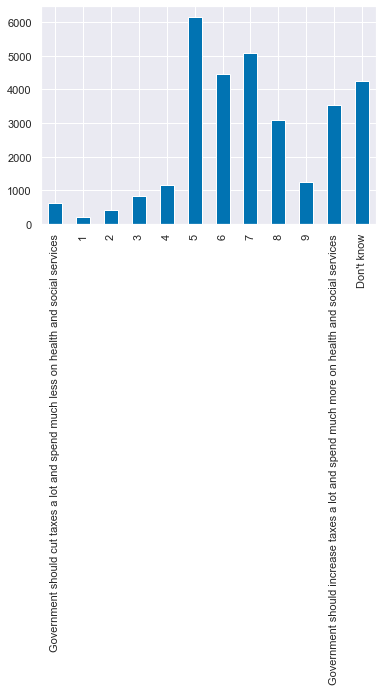

In [7]:
BES_Panel["taxSpendSelfW14"].value_counts().sort_index().plot(kind='bar')

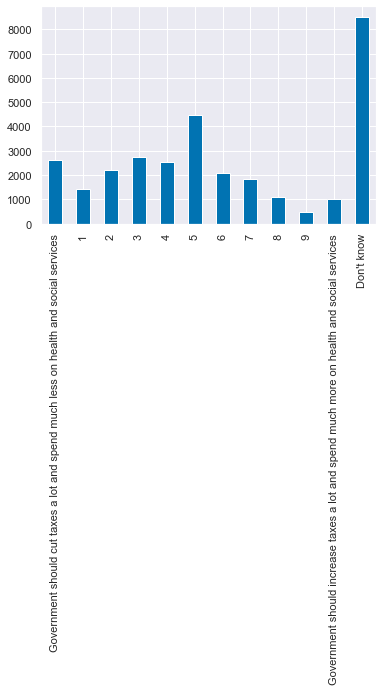

In [8]:
BES_Panel["taxSpendConW14"].value_counts().sort_index().plot(kind='bar')

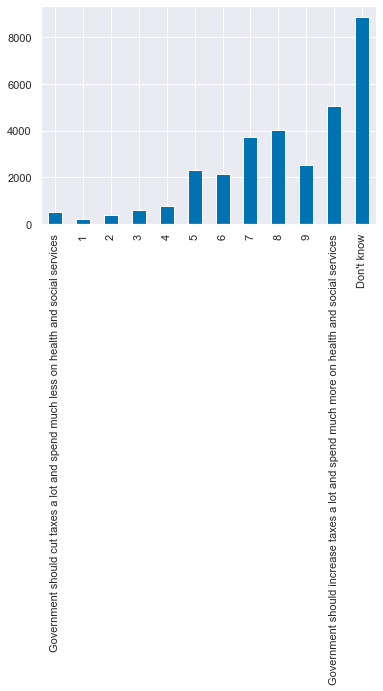

In [9]:
BES_Panel["taxSpendLabW14"].value_counts().sort_index().plot(kind='bar')

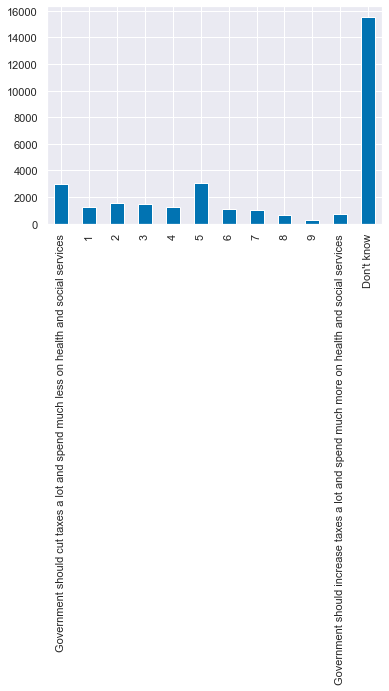

In [10]:
BES_Panel["taxSpendUKIPW14"].value_counts().sort_index().plot(kind='bar')

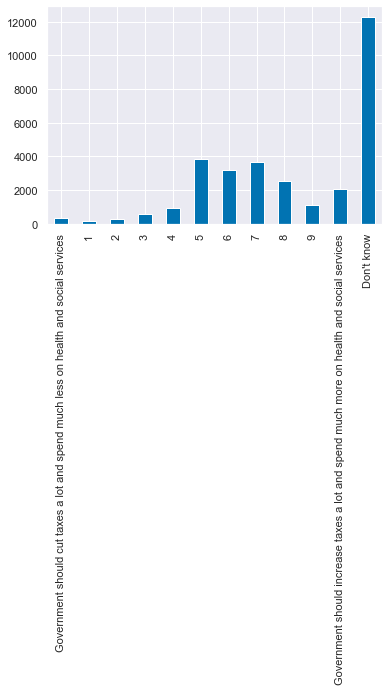

In [11]:
BES_Panel["taxSpendLDW14"].value_counts().sort_index().plot(kind='bar')

In [49]:
search(BES_Panel,"taxSpend|tax(Low|Middle|High)Income|bes(1|2|3|4)(a|b)W2|socialCare|howToReduceDeficit|deficitReduce|spend(Health|Pensions|Unemp)")

bes1aW2                   1328
bes2aW2                   1352
bes3aW2                   1316
bes4aW2                   1415
bes4bW2                   1415
deficitReduceW4          31551
howToReduceDeficitW4     31551
deficitReduceW6          30258
howToReduceDeficitW6     30258
deficitReduceW10         30237
howToReduceDeficitW10    30237
deficitReduceW11         30956
howToReduceDeficitW11    30956
socialCareW13            31136
taxSpendSelfW14          31063
taxSpendConW14           31063
taxSpendLabW14           31063
taxSpendLDW14            31063
taxSpendUKIPW14          31063
taxSpendSNPW14            3408
taxSpendPCW14             2028
taxSpendGreenW14         31063
taxHighIncomeW15          6880
taxMiddleIncomeW15        6880
taxLowIncomeW15           6880
spendHealthW15            6880
spendPensionsW15          6880
spendUnempW15             6880
taxSpendSelfW15           6880
taxSpendConW15            6880
taxSpendLabW15            6880
deficitReduceW15          6880
howToRed

Wall time: 4.02 s


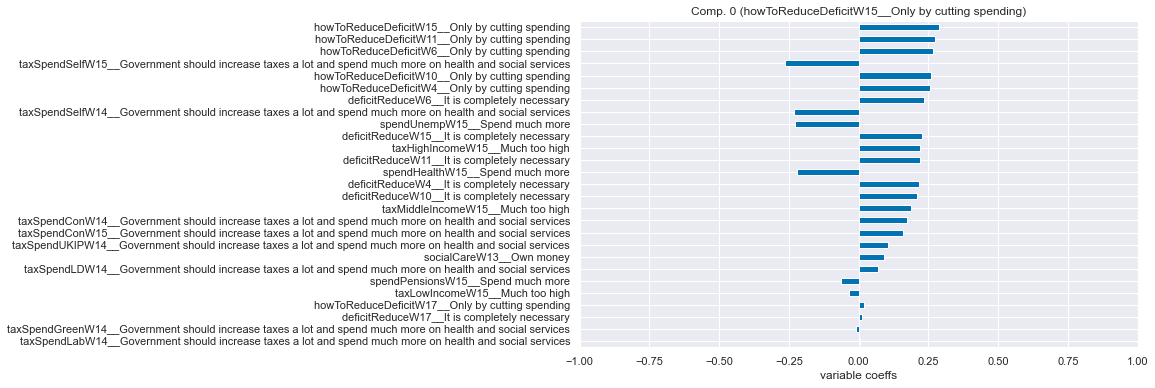

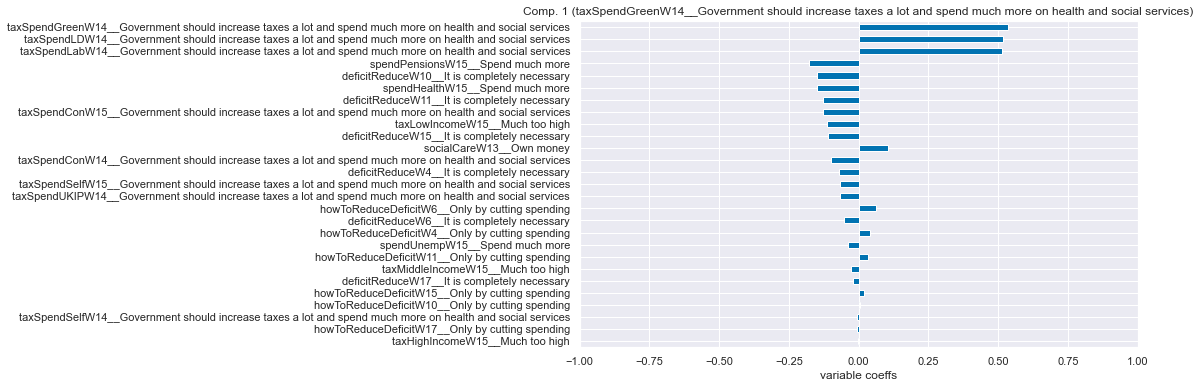

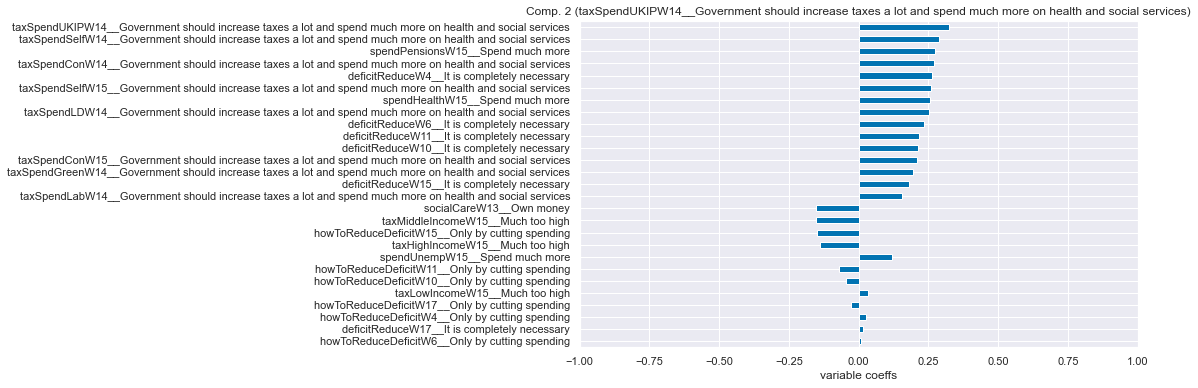

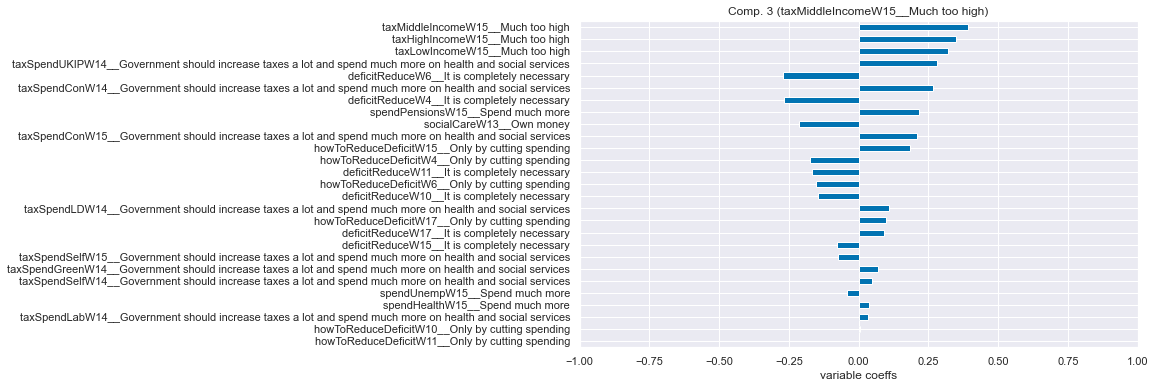

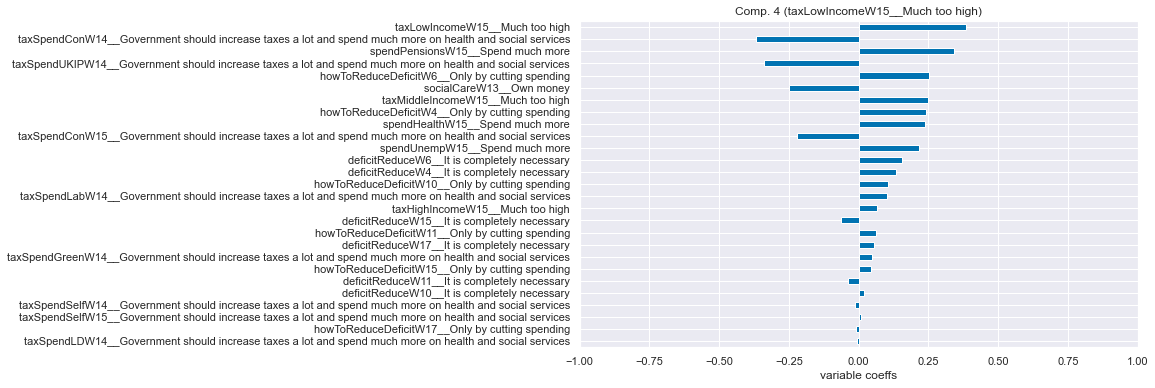

In [3]:
%%time

Treatment = "Tax Attitude Decomposition"
output_subfolder = BES_output_folder + Treatment + os.sep
if not os.path.exists( output_subfolder ):
    os.makedirs( output_subfolder )

# value_vars = [x for x in manifesto_project.columns if re.match("per(\d+|uncod)|rile|planeco|markeco|welfare|intpeace",x)]
value_vars = search(BES_reduced_with_na,"taxSpend|tax(Low|Middle|High)Income|bes(1|2|3|4)(a|b)W2|socialCare|howToReduceDeficit|deficitReduce|spend(Health|Pensions|Unemp)").index
# rile, planeco, markeco, welfare, intpeace
# notnulls = BES_reduced_with_na[value_vars].notnull().any(axis=1)
notnulls = BES_reduced_with_na["taxLowIncomeW15__Much too high"].notnull()
MCP_vals = BES_reduced_with_na[value_vars][notnulls]
MCP_vals = MCP_vals.fillna(MCP_vals.mean())
# df["peruncod"]
# percentage uncoded
# MCP_vals.columns = [variable_labels.loc[x]+"("+x.replace("per","")+")" for x in MCP_vals.columns]
# MCP_vals.columns
MCP_vals = MCP_vals.drop_duplicates()


decomp_index = MCP_vals.index
decomp_columns = MCP_vals.columns
clean_feature_set_std = StandardScaler().fit_transform(MCP_vals.values )
decomp_std = pd.DataFrame(   clean_feature_set_std,
                             columns = MCP_vals.columns,
                             index   = MCP_vals.index      )



# 5 mins
## RUN (some variant of) PCA (potentially v slow!)
n_components = decomp_std.shape[1]
n_components = 5
# (svd_solver='full', n_components='mle',whiten=True)
decomp = PCA(n_components = n_components,svd_solver='full')
# decomp = FastICA(algorithm='deflation', fun='exp', fun_args=None, max_iter=1000,
#     n_components=None, random_state=None, tol=0.07, w_init=None, whiten=False) # 2h 1min 4s "fast"
# decomp = SparsePCA(n_components=n_components, alpha=2,max_iter=1000,n_jobs=4,tol=1e-10, verbose=True) # 5min
#
# alpha=2 -> 1hr

# decomp = FactorAnalysis(svd_method = 'lapack',n_components = n_components) ## ~10s ,n_components=30 -> 1.5 hrs
decomp_method = str(decomp).split("(")[0] 
# ,n_components=30

X_r = decomp.fit_transform(decomp_std)

BES_decomp = pd.DataFrame(   X_r,
                             columns = range(0,n_components),
                             index   = decomp_index)


import pickle
# treatdir = BES_data_folder+Treatment
# subdir = BES_data_folder+Treatment+decomp_method
load_suff = "FactorAnalysis"
save = True # False => Load

if save & ( 'decomp' in globals() ): # SAVE    ##( 'decomp' not in globals() )
    decomp_method = str(decomp).split("(")[0] 
    subdir = output_subfolder + decomp_method
    fname = subdir+ os.sep + decomp_method
    # create dir, save decomp object, BES_decomp, BES_std    
    if not os.path.exists(subdir): os.makedirs(subdir)
    with open(fname+".pkl", "wb") as f: pickle.dump( decomp, f )
    BES_decomp.to_hdf(fname+".hdf"        , decomp_method)
    decomp_std.to_hdf(   fname+"_std"+".hdf" , decomp_method)
    
else: # LOAD decomp results (default is SAVE)
    decomp_method = load_suff
    subdir = output_subfolder + os.sep + decomp_method    
    fname = subdir + os.sep + decomp_method
    if not os.path.exists(subdir): raise Exception(subdir + ' does not exist!')
    # load decomp object, BES_decomp, BES_std, n_components
    with open(fname+".pkl", "rb") as f: decomp = pickle.load(f) 
    BES_decomp = pd.read_hdf(fname+".hdf")
    decomp_std    = pd.read_hdf(fname+"_std"+".hdf")
    n_components = decomp.components_.shape[0] 
    
    
(BES_decomp, comp_labels, comp_dict) = display_components(n_components, decomp,
                                                          decomp_columns, BES_decomp, manifest=None, 
                                                          save_folder = subdir,  
                                                          show_first_x_comps= 7, show_histogram = False)    

In [17]:
decomp.score(decomp_std)

-35.660241301549476

In [35]:
np.mean(cross_val_score(decomp, decomp_std,verbose=10,cv=10))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[CV] .................................. , score=-38.232, total=   0.3s
[CV]  ................................................................
[CV] .................................. , score=-37.797, total=   0.2s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s


[CV] .................................. , score=-38.118, total=   0.1s
[CV]  ................................................................
[CV] .................................. , score=-38.274, total=   0.1s
[CV]  ................................................................
[CV] .................................. , score=-35.045, total=   0.0s
[CV]  ................................................................
[CV] .................................. , score=-34.992, total=   0.0s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.5s remaining:    0.0s


[CV]  ................................................................
[CV] .................................. , score=-35.438, total=   0.1s
[CV]  ................................................................
[CV] .................................. , score=-33.378, total=   0.0s
[CV]  ................................................................
[CV] .................................. , score=-34.086, total=   0.1s
[CV]  ................................................................
[CV] .................................. , score=-46.767, total=   0.0s


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.9s finished


-37.212657614076775

In [25]:
decomp.score_samples(decomp_std).sort_values()

id
78210   -471.818503
78410   -317.974444
76813   -307.445566
79696   -284.505984
78355   -243.842104
            ...    
77051    -24.508041
78055    -24.493801
76823    -24.437792
25958    -24.425249
38073    -24.033642
Length: 6185, dtype: float64

average log-likelihood of all samples: -35.660241301549476
number of iterations: 2


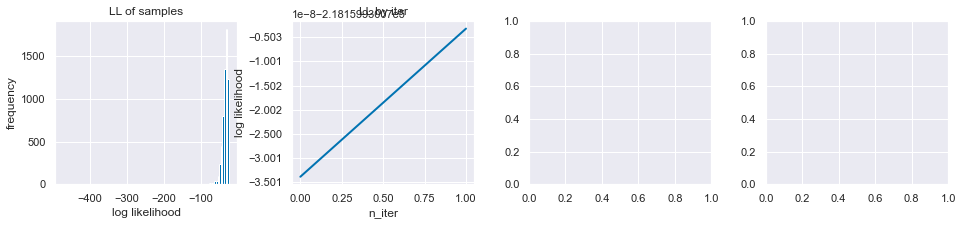

In [9]:
display_pca_data(n_components,decomp,decomp_std)

In [15]:
fa_scores

[-1000000007415.0105,
 -1000000007413.5856,
 -1000000007413.1328,
 -1000000007412.8785,
 -1000000007412.641,
 -1000000007412.5111,
 -1000000007412.3492,
 -1000000007412.2012,
 -1000000007412.1836,
 -1000000007412.1707,
 -1000000007412.1174,
 -1000000007412.1143,
 -1000000007412.1055,
 -1000000007412.0989,
 -1000000007412.1166,
 -1000000007412.1176,
 -1000000007412.0881,
 -1000000007412.1091,
 -1000000007412.1096,
 -1000000007412.1111]

In [14]:
pca_scores

[-38.465896962666775,
 -37.456146240234375,
 -37.227499389648436,
 -37.04715118408203,
 -36.94066162109375,
 -36.95356903076172,
 -37.132544708251956,
 -37.32520370483398,
 -37.441873931884764,
 -37.287986755371094,
 -37.335881042480466,
 -37.36822509765625,
 -37.41899108886719,
 -37.46868209838867,
 -37.57834167480469,
 -37.684766387939455,
 -37.80770416259766,
 -37.94292221069336,
 -38.0890007019043,
 -38.28398132324219]

Module created for script run in IPython
best n_components by PCA CV = 5
best n_components by FactorAnalysis CV = 6
best n_components by PCA MLE = 5
best n_components by PCA CV = 9
best n_components by FactorAnalysis CV = 5
best n_components by PCA MLE = 9
best n_components by PCA CV = 5
best n_components by FactorAnalysis CV = 8
best n_components by PCA MLE = 26


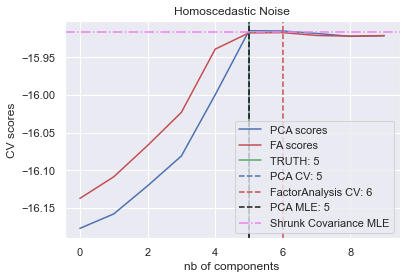

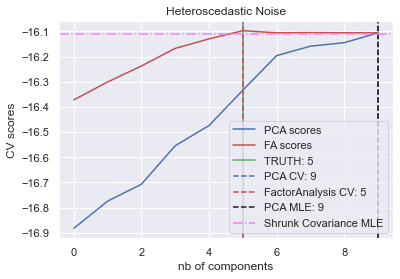

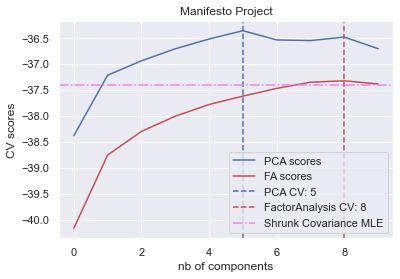

Wall time: 44.4 s


In [39]:
%%time
# Authors: Alexandre Gramfort
#          Denis A. Engemann
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg

from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.covariance import ShrunkCovariance, LedoitWolf
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

print(__doc__)

# #############################################################################
# Create the data

n_samples, n_features, rank = 1000, 10, 5
sigma = 1.
rng = np.random.RandomState(42)
U, _, _ = linalg.svd(rng.randn(n_features, n_features))
X = np.dot(rng.randn(n_samples, rank), U[:, :rank].T)

# Adding homoscedastic noise
X_homo = X + sigma * rng.randn(n_samples, n_features)

# Adding heteroscedastic noise
sigmas = sigma * rng.rand(n_features) + sigma / 2.
X_hetero = X + rng.randn(n_samples, n_features) * sigmas

# #############################################################################
# Fit the models

n_components = np.arange(0, n_features, 1)  # options for n_components


def compute_scores(X):
    pca = PCA(svd_solver='full')
    fa = FactorAnalysis()

    pca_scores, fa_scores = [], []
    for n in n_components:
        pca.n_components = n
        fa.n_components = n
        pca_scores.append( np.mean(cross_val_score(pca, X, cv=10)) )
        fa_scores.append(np.mean(cross_val_score(fa, X, cv=10)))

    return pca_scores, fa_scores


def shrunk_cov_score(X):
    shrinkages = np.logspace(-2, 0, 30)
    cv = GridSearchCV(ShrunkCovariance(), {'shrinkage': shrinkages})
    return np.mean(cross_val_score(cv.fit(X).best_estimator_, X))


def lw_score(X):
    return np.mean(cross_val_score(LedoitWolf(), X))


decomp_index = MCP_vals.index
decomp_columns = MCP_vals.columns
clean_feature_set_std = StandardScaler().fit_transform(MCP_vals.values )
decomp_std = pd.DataFrame(   clean_feature_set_std,
                             columns = MCP_vals.columns,
                             index   = MCP_vals.index      )


# (X_homo, 'Homoscedastic Noise'),
#                  (X_hetero, 'Heteroscedastic Noise'),

for X, title in [(X_homo, 'Homoscedastic Noise'),
                 (X_hetero, 'Heteroscedastic Noise'),
                 (decomp_std.values, 'Manifesto Project')]:
    pca_scores, fa_scores = compute_scores(X)
    n_components_pca = n_components[np.argmax(pca_scores)]
    n_components_fa = n_components[np.argmax(fa_scores)]

    pca = PCA(svd_solver='full', n_components='mle')
    pca.fit(X)
    n_components_pca_mle = pca.n_components_

    print("best n_components by PCA CV = %d" % n_components_pca)
    print("best n_components by FactorAnalysis CV = %d" % n_components_fa)
    print("best n_components by PCA MLE = %d" % n_components_pca_mle)

    plt.figure()
    plt.plot(n_components, pca_scores, 'b', label='PCA scores')
    plt.plot(n_components, fa_scores, 'r', label='FA scores')
    if title in [ 'Homoscedastic Noise','Heteroscedastic Noise']:
        plt.axvline(rank, color='g', label='TRUTH: %d' % rank, linestyle='-')
    plt.axvline(n_components_pca, color='b',
                label='PCA CV: %d' % n_components_pca, linestyle='--')
    plt.axvline(n_components_fa, color='r',
                label='FactorAnalysis CV: %d' % n_components_fa,
                linestyle='--')
    if title in [ 'Homoscedastic Noise','Heteroscedastic Noise']:    
        plt.axvline(n_components_pca_mle, color='k',
                label='PCA MLE: %d' % n_components_pca_mle, linestyle='--')

    # compare with other covariance estimators
    plt.axhline(shrunk_cov_score(X), color='violet',
                label='Shrunk Covariance MLE', linestyle='-.')
#     plt.axhline(lw_score(X), color='orange',
#                 label='LedoitWolf MLE' % n_components_pca_mle, linestyle='-.')

    plt.xlabel('nb of components')
    plt.ylabel('CV scores')
    plt.legend(loc='lower right')
    plt.title(title)

plt.show()

best n_components by PCA CV = 5
best n_components by FactorAnalysis CV = 16
best n_components by PCA MLE = 26


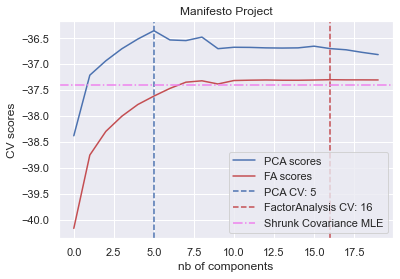

In [38]:
for X, title in [
                 (decomp_std.values, 'Manifesto Project')]:
#     pca_scores, fa_scores = compute_scores(X)
    n_components_pca = n_components[np.argmax(pca_scores)]
    n_components_fa = n_components[np.argmax(fa_scores)]

    pca = PCA(svd_solver='full', n_components='mle')
    pca.fit(X)
    n_components_pca_mle = pca.n_components_

    print("best n_components by PCA CV = %d" % n_components_pca)
    print("best n_components by FactorAnalysis CV = %d" % n_components_fa)
    print("best n_components by PCA MLE = %d" % n_components_pca_mle)

    plt.figure()
    plt.plot(n_components, pca_scores, 'b', label='PCA scores')
    plt.plot(n_components, fa_scores, 'r', label='FA scores')
    if title in [ 'Homoscedastic Noise','Heteroscedastic Noise']:
        plt.axvline(rank, color='g', label='TRUTH: %d' % rank, linestyle='-')
    plt.axvline(n_components_pca, color='b',
                label='PCA CV: %d' % n_components_pca, linestyle='--')
    plt.axvline(n_components_fa, color='r',
                label='FactorAnalysis CV: %d' % n_components_fa,
                linestyle='--')
    if title in [ 'Homoscedastic Noise','Heteroscedastic Noise']:    
        plt.axvline(n_components_pca_mle, color='k',
                label='PCA MLE: %d' % n_components_pca_mle, linestyle='--')

    # compare with other covariance estimators
    plt.axhline(shrunk_cov_score(X), color='violet',
                label='Shrunk Covariance MLE', linestyle='-.')
#     plt.axhline(lw_score(X), color='orange',
#                 label='LedoitWolf MLE' % n_components_pca_mle, linestyle='-.')

    plt.xlabel('nb of components')
    plt.ylabel('CV scores')
    plt.legend(loc='lower right')
    plt.title(title)

plt.show()

Module created for script run in IPython
LLE: 46 sec
LTSA: 1.6e+02 sec
Hessian LLE: 80 sec
Modified LLE: 55 sec
Isomap: 49 sec
MDS: 68 sec
SE: 60 sec
t-SNE: 97 sec


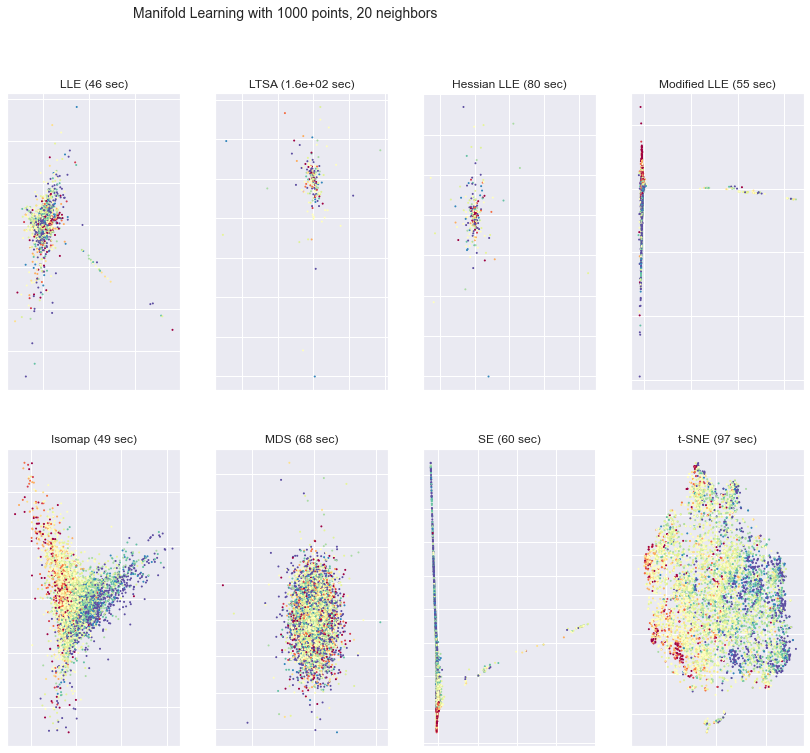

Wall time: 10min 22s


In [54]:
%%time
# Author: Jake Vanderplas -- <vanderplas@astro.washington.edu>

print(__doc__)

from collections import OrderedDict
from functools import partial
from time import time

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter

from sklearn import manifold, datasets

# Next line to silence pyflakes. This import is needed.
Axes3D

# n_points = 1000
# X, color = datasets.make_s_curve(n_points, random_state=0)

X = decomp_std.values#MCP_vals.values
color = MCP_vals["taxSpendSelfW15__Government should increase taxes a lot and spend much more on health and social services"]
n_neighbors = 20
n_components = 2

# Create figure
fig = plt.figure(figsize=(18, 12))
fig.suptitle("Manifold Learning with %i points, %i neighbors"
             % (1000, n_neighbors), fontsize=14)

# # Add 3d scatter plot
# ax = fig.add_subplot(251, projection='3d')
# ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
# ax.view_init(4, -72)

# Set-up manifold methods
LLE = partial(manifold.LocallyLinearEmbedding,
              n_neighbors, n_components, eigen_solver='dense')

methods = OrderedDict()
methods['LLE'] = LLE(method='standard')
methods['LTSA'] = LLE(method='ltsa')
methods['Hessian LLE'] = LLE(method='hessian')
methods['Modified LLE'] = LLE(method='modified')
methods['Isomap'] = manifold.Isomap(n_neighbors, n_components)
methods['MDS'] = manifold.MDS(n_components, max_iter=20, n_init=1)
methods['SE'] = manifold.SpectralEmbedding(n_components=n_components,
                                           n_neighbors=n_neighbors)
methods['t-SNE'] = manifold.TSNE(n_components=n_components, init='pca',
                                 random_state=0)

# Plot results
for i, (label, method) in enumerate(methods.items()):
    t0 = time()
    Y = method.fit_transform(X)
    t1 = time()
    print("%s: %.2g sec" % (label, t1 - t0))
    ax = fig.add_subplot(2, 5, 2 + i + (i > 3))
    ax.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral,s=1)
    ax.set_title("%s (%.2g sec)" % (label, t1 - t0))
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')

plt.show()

In [53]:
search(BES_reduced_with_na,"taxSpendSelf")

taxSpendSelfW14__Government should increase taxes a lot and spend much more on health and social services    26822
taxSpendSelfW15__Government should increase taxes a lot and spend much more on health and social services     5890
dtype: int64

In [26]:
tax_spend = "taxSpendSelfW15__Government should increase taxes a lot and spend much more on health and social services"

In [27]:
%%time

pattern = "taxSpendSelf"
name = "taxSpendSelfW15__Government should increase taxes a lot and spend much more on health and social services"
corr_type = "spearman"
df,corr_type = make_corr_summary(BES_reduced_with_na,
                                 name, corr_type)
display_corr(df, name, corr_type, text_wrap_length=50)


Top 20 positive (spearman) correlations for taxSpendSelfW15__Government should increase taxes a lot and spend much more on health and social services r p N 
 
 taxSpendSelfW14__Government should increase taxes[...] 
 0.580000 
 0.00 
 3512 
 
 
 spendHealthW15__Spend much more 
 0.440000 
 0.00 
 5744 
 
 
 cutsTooFarNationalW18__Gone much too far 
 0.400000 
 0.00 
 1221 
 
 
 cutsTooFarNHSW14__Gone much too far 
 0.400000 
 0.00 
 3584 
 
 
 bestPMW8_Jeremy Corbyn 
 0.400000 
 0.00 
 1443 
 
 
 changeEconomyLabW1__Getting a lot better 
 0.390000 
 0.00 
 1706 
 
 
 likeGrnW4__Strongly like 
 0.390000 
 0.00 
 1045 
 
 
 likeLucasW11__Strongly like 
 0.390000 
 0.00 
 2125 
 
 
 likeBerryW19__Strongly like 
 0.390000 
 0.00 
 787 
 
 
 ptvLabW8__Very likely 
 0.390000 
 0.00 
 643 
 
 
 likeRaynerW19__Strongly like 
 0.380000 
 0.00 
 1253 
 
 
 likeStarmerW19__Strongly like 
 0.380000 
 0.00 
 2010 
 
 
 changeEducationLabW1__Getting a lot better 
 0.380000 
 0.00 
 1686 
 
 
 likeLabW8__Strongly like 
 0.370000 
 0.00 
 2887 
 
 
 labHandleEconW3__Very well 
 0.370000 
 0.00 
 1386 
 
 
 cutsTooFarLocalW18__Gone much too far 
 0.370000 
 0.00 
 1163 
 
 
 changeNHSLabW1__Getting a lot better 
 0.370000 
 0.00 
 1715 
 
 
 likeMilibandW5__Strongly like 
 0.350000 
 0.00 
 2145 
 
 
 generalElectionVoteW8_Labour 
 0.350000 
 0.00 
 2433 
 
 
 lr1W13__Strongly agree 
 0.350000 
 0.00 
 3211 
 
 Top 20 negative (spearman) correlations for taxSpendSelfW15__Government should increase taxes a lot and spend much more on health and social services r p N 
 
 howToReduceDeficitW15__Only by cutting spending 
 -0.510000 
 0.00 
 5152 
 
 
 leftRightW18__Right 
 -0.420000 
 0.00 
 3201 
 
 
 govtHandleNHSW3__Very well 
 -0.350000 
 0.00 
 1457 
 
 
 taxHighIncomeW15__Much too high 
 -0.340000 
 0.00 
 5543 
 
 
 generalElectionVoteUnsqueezeW12_Conservative 
 -0.340000 
 0.00 
 2078 
 
 
 redistSelfW6__Government should be less concerned[...] 
 -0.340000 
 0.00 
 2065 
 
 
 likeGoveW8__Strongly like 
 -0.340000 
 0.00 
 2572 
 
 
 likeNuttallW10__Strongly like 
 -0.340000 
 0.00 
 1154 
 
 
 thatcherGoodW1_Good for Britain 
 -0.340000 
 0.00 
 1591 
 
 
 ptvConW8__Very likely 
 -0.340000 
 0.00 
 643 
 
 
 changeNHSW12__Getting a lot better 
 -0.340000 
 0.00 
 3326 
 
 
 preferLabMajorityW4__Ranked fifth 
 -0.330000 
 0.00 
 2075 
 
 
 preferLabCoalitionW4__Ranked fifth 
 -0.330000 
 0.00 
 2075 
 
 
 likeMoggW14__Strongly like 
 -0.330000 
 0.00 
 2934 
 
 
 ptvUKIPW8__Very likely 
 -0.320000 
 0.00 
 655 
 
 
 govtHandoutsW1__Strongly agree 
 -0.320000 
 0.00 
 1801 
 
 
 conLookAfterWCW12__Very closely 
 -0.310000 
 0.00 
 3200 
 
 
 govtHandleEducW7__Very well 
 -0.310000 
 0.00 
 2030 
 
 
 likeConW11__Strongly like 
 -0.310000 
 0.00 
 3108 
 
 
 approveUKGovtW11__Strongly approve 
 -0.310000 
 0.00 
 3127

Wall time: 1min 9s


In [13]:
BES_data_folder

'../BES_analysis_data/'

In [14]:
df = pd.read_pickle(BES_data_folder+"W19_comb_strings"+os.sep+"tvradiopaperinternet_dummied_with_nulls.zip",compression='zip')

In [19]:
df[[x for x in df if "spectator" in x]].any(axis=1).sum()

174

In [24]:
df[[x for x in df if "_rt" in x]].any(axis=1).sum()

210

In [ ]:
def mediate_two_vars(self_var,other_var,wave1,wave2,min_sample_size=1000):

    conShift = BES_reduced_with_na[other_var] - BES_reduced_with_na[other_var.replace(wave2,wave1)]
    conShift = conShift-conShift.mean()
    selfShift = BES_reduced_with_na[self_var] - BES_reduced_with_na[self_var.replace(wave2,wave1)]
    selfShift = selfShift-selfShift.mean()
    print("base correlation: ",conShift.corr(selfShift))

    mask = conShift.notnull()&selfShift.notnull()
    notnulls = BES_reduced_with_na[mask].notnull().sum()
    df = BES_reduced_with_na.loc[mask,notnulls.index[notnulls>=1000]]
    df = df.apply(lambda x: x*conShift[mask])
    corrs = df.corrwith(selfShift[mask])
    return corrs

In [26]:
def mediate_two_vars( self_var, other_var, min_sample_size=1000 ):

#     conShift = BES_reduced_with_na[other_var] - BES_reduced_with_na[other_var.replace(wave2,wave1)]
#     conShift = conShift-conShift.mean()
#     selfShift = BES_reduced_with_na[self_var] - BES_reduced_with_na[self_var.replace(wave2,wave1)]
#     selfShift = selfShift-selfShift.mean()

    other_var = other_var - other_var.mean()
    self_var  = self_var  - self_var.mean()

    print( "base correlation: ", other_var.corr(self_var) )

    mask = other_var.notnull()&self_var.notnull()
    
    print( "sample size: ", mask.sum() )
    notnulls = BES_reduced_with_na[mask].notnull().sum()
    df = BES_reduced_with_na.loc[ mask , notnulls.index[notnulls>=min_sample_size] ]
    df = df.apply(lambda x: x*other_var[mask])
    corrs = df.corrwith(self_var[mask])
    corrs = pd.concat([corrs,notnulls],axis=1)
    corrs.columns = ["correlation","N"]
    corrs["abs_corr"] = corrs["correlation"].abs()
    
    
    return corrs

In [15]:
%%time
self_var = "immigSelfW10__Allow many more"
other_var = "immigConW10__Allow many more"

conShift = BES_reduced_with_na[other_var] - BES_reduced_with_na[other_var.replace("W10","W8")]

selfShift = BES_reduced_with_na[self_var] - BES_reduced_with_na[self_var.replace("W10","W8")]

corrs = mediate_two_vars(selfShift,conShift,min_sample_size=1000)

corrs.dropna().sort_values(by="correlation").tail(50)

base correlation:  0.1267624332404467
Wall time: 26.9 s


correlation      N
likeConW9__Strongly like                               0.173031  12860
govtHandleCostLiveW3__Very well                        0.173309   1907
enviroGrowthBrexitW17__Protecting the environme...     0.173548   4910
likeCameronW2__Strongly like                           0.173701   7879
likeOsborneW8__Strongly like                           0.174318  14003
enviroGrowthConW17__Protecting the environment ...     0.174472   6230
taxSpendConW15__Government should increase taxe...     0.174492   1509
likeCameronW3__Strongly like                           0.174722   7784
likeOsborneW7__Strongly like                           0.174955  10896
redistSelfW3__Government should be less concern...     0.175030   7507
likeCameronW9__Strongly like                           0.175287  12865
leftRightW17__Right                                    0.175491   6419
likeConW1__Strongly like                               0.175903   3679
empathy10W14__Strongly agree                           0.176323   2173
likeCameronW5__Strongly like                           0.176846   8842
conGovTrustW5__ Would do a good job                    0.177048   8805
ptvConW6__Very likely                                  0.177582   4504
empathy8W14__Strongly agree                            0.178098   2218
ptvConW3__Very likely                                  0.178462   3874
wcEconW15__Got a lot better                            0.178544   1686
generalElectionCertaintySqW18__Completely certain      0.178827   1026
empathy4W14__Strongly agree                            0.178987   2165
likeCameronW4__Strongly like                           0.179439   8896
sdodominance1W15__Strongly favour                      0.179957   1721
likeConW8__Strongly like                               0.180774  14228
sdoantiegal2W15__Strongly favour                       0.180905   1708
ptvConExpW14__Very likely                              0.181226   2296
econPersonalProspW1__Get a lot better                  0.181758   1315
govtHandleEconW7__Very well                            0.182719   2706
likeCameronW8__Strongly like                           0.182952  14231
approveUKGovtW7__Strongly approve                      0.183206  11062
partyIdSqueezeW2_Conservative                          0.183948   1142
partyIdSqueezeW3_No - none                             0.184241   1214
lrgreensW17__Right                                     0.184571   5693
ptvConW5__Very likely                                  0.185787   4418
likeConW7__Strongly like                               0.186760  11056
immigConW17__Allow many more                           0.186877   6548
likeCameronW7__Strongly like                           0.190508  11046
govtHandleEducW7__Very well                            0.190551   2639
leftRightW8__Right                                     0.190588   2506
likeBartleyW16__Strongly like                          0.191502   1067
econGenRetroW12__Got a lot better                      0.191886   1112
ptvConW4__Very likely                                  0.193395   4431
govtHandleNHSW4__Very well                             0.194158   2159
econPersonalRetroW12__Got a lot better                 0.199333   1121
deficitReduceW15__It is completely necessary           0.200656   1646
econGenProspW1__Get a lot better                       0.204712   1321
handleMIIConW6__Very well                              0.206481   2127
govtHandleNHSW7__Very well                             0.211093   2711
deficitReduceW17__It is completely necessary           0.214553   1700

In [25]:
corrs.dropna().sort_values(by="correlation")[corrs.dropna()["N"]>2000].head(50)

correlation     N
labPartnerGreenW11_Would join Labour                  -0.533277  2062
euRefCertaintyW8__Completely certain                  -0.532895  2236
immigGreenW15__Allow many more                        -0.531058  3285
labPartnerGreenW18_Would join Labour                  -0.529254  2380
EUIntegrationUKIPW9__Protect our independence         -0.529047  2333
efficacyEUW8__Strongly agree                          -0.528517  2605
lrUKIPW12__Right                                      -0.528430  2492
efficacyUnderstandW9__Strongly agree                  -0.528188  2474
efficacyUnderstandW8__Strongly agree                  -0.528163  2610
euRefTurnoutW8__Very likely that I will vote          -0.527523  2273
redistConW19__Government should be less concern...    -0.527363  2625
euRefTurnoutRetroW9_Yes                               -0.527116  2488
polAttentionW8__Pay a great deal of attention         -0.526372  2619
knowf2f4W11W12W14_True                                -0.525675  2749
immigLabW8__Allow many more                           -0.525126  2207
EUIntegrationBrexitW18__Protect our independence      -0.524681  3102
generalElectionCertaintyUnsqW18__Completely cer...    -0.524450  2010
knowf2f5W11W12W14_True                                -0.524048  2923
lrConW12__Right                                       -0.524039  2602
EUIntegrationUKIPW8__Protect our independence         -0.523932  2441
redistConW11__Government should be less concern...    -0.523853  2387
polAttentionW19__Pay a great deal of attention        -0.523675  3027
EUIntegrationBrexitW19__Protect our independence      -0.523600  2827
turnoutUKGeneralW9__Very likely that I will vote      -0.522985  2438
redistBrexitW18__Government should be less conc...    -0.522674  2215
lrUKIPW11__Right                                      -0.522493  2314
immigLabW11__Allow many more                          -0.522057  2447
polKnowPutinW5W7W9_President of Russia                -0.521949  2734
EUIntegrationUKIPW11__Protect our independence        -0.521642  2542
natSecurityLDW13__Protect civil liberties             -0.521593  2212
turnoutUKGeneralW8__Very likely that I will vote      -0.521260  2592
taxSpendLabW14__Government should increase taxe...    -0.520956  2679
conPartnerUKIPW11_Would join Conservatives            -0.520332  2175
euRefInterestW8__Very interested                      -0.520063  2616
euKnow2W8_False                                       -0.519913  2311
euLeaveScotIndepW8__Much more likely                  -0.519912  2145
registeredW13_Yes - at $postcode_hidden               -0.519904  2941
generalElectionCertaintyW12__Completely certain       -0.519430  2304
brexitBrexPrefW18__Leave with no deal                 -0.519416  3061
prefTradeoffW8__Strongly agree                        -0.519207  2545
euID4W9__Strongly agree                               -0.519156  2013
certaintyEUUKIPW8__Very certain                       -0.519144  2398
immigLabW9__Allow many more                           -0.518864  2234
selfEUCertainW8__Very certain                         -0.518717  2552
lrBrexitW17__Right                                    -0.518607  2379
conPartnerBrexitW18_Would join Conservatives          -0.518576  2794
p_edlevelUniW9__Postgrad                              -0.518229  2333
lrBrexitW18__Right                                    -0.518208  2683
p_sexualityW9_Heterosexual                            -0.516787  2399
polKnowMerkelW5W7W9_Chancellor of Germany             -0.516783  2739

In [35]:
%%time
self_var = "taxSpendSelfW15__Government should increase taxes a lot and spend much more on health and social services"
other_var = "spendHealthW15__Spend much more"

# conShift = BES_reduced_with_na[other_var] - BES_reduced_with_na[other_var.replace("W10","W8")]
conShift = BES_reduced_with_na[other_var]


selfShift = BES_reduced_with_na[self_var]
#BES_reduced_with_na[self_var] - BES_reduced_with_na[self_var.replace("W10","W8")]

corrs = mediate_two_vars(selfShift,conShift,min_sample_size=1000)

corrs.dropna().sort_values(by="abs_corr",ascending=False).head(50)



base correlation:  0.42742230355568606
sample size:  5744
Wall time: 15.8 s


correlation     N  \
redistUKIPW3__Government should be less concern...     0.522256  1233   
degreeCheckW19__Very well                              0.515753  1377   
redistUKIPW2__Government should be less concern...     0.512806  1162   
redistConW3__Government should be less concerne...     0.511513  1509   
generalElectionCertaintyUnsqW12__Completely cer...     0.506312  2046   
redistUKIPW1__Government should be less concern...     0.505003  1181   
partyContactCon_2W19_Yes                               0.504893  1118   
lrUKIPW9__Right                                        0.504871  1884   
lrUKIPW2__Right                                        0.504356  1497   
immigGreenW9__Allow many more                          0.503490  1686   
lrUKIPW3__Right                                        0.500913  1482   
redistConW4__Government should be less concerne...     0.500876  1733   
redistUKIPW13__Government should be less concer...     0.498310  2067   
lrConW9__Right                                         0.498165  1937   
partyContactCon_2W13_Yes                               0.496726  1077   
lrConW3__Right                                         0.496289  1549   
EUIntegrationUKIPW1__Protect our independence          0.495673  1318   
polKnowNetanyahuW2_W4W7W9_Prime Minister of Israel     0.495456  1797   
redistUKIPW4__Government should be less concern...     0.494915  1399   
redistConW13__Government should be less concern...     0.494885  2711   
redistConW1__Government should be less concerne...     0.494435  1512   
lrConW8__Right                                         0.494093  1565   
lrUKIPW12__Right                                       0.492181  2669   
lrUKIPW10__Right                                       0.490552  2244   
lrUKIPW4__Right                                        0.487952  1738   
EUIntegrationUKIPW3__Protect our independence          0.487754  1422   
taxSpendGreenW14__Government should increase ta...     0.487080  2059   
redistUKIPW11__Government should be less concer...     0.487038  2076   
lrBrexitW18__Right                                     0.486893  2889   
labPartnerGreenW11_Would join Labour                   0.486410  2218   
redistConW11__Government should be less concern...     0.486402  2560   
natSecurityGrnW13__Protect civil liberties             0.485580  1989   
immigGreenW8__Allow many more                          0.485397  1740   
EUIntegrationUKIPW2__Protect our independence          0.485389  1418   
labPartnerGreenW4_Would join Labour                    0.485367  1602   
ukipPriorities_immigW3_Yes                             0.484798  1250   
lrConW2__Right                                         0.484722  1565   
lrConW4__Right                                         0.484000  1798   
lrUKIPW7__Right                                        0.483373  2010   
lrConW12__Right                                        0.482640  2788   
knowMPW1_Correct name                                  0.482560  1450   
lrUKIPW11__Right                                       0.482366  2484   
redistUKIPW6__Government should be less concern...     0.482239  1460   
immigGreenW15__Allow many more                         0.481989  3501   
redistConW2__Government should be less concerne...     0.481749  1468   
generalElectionCertaintyW11__Completely certain        0.481578  2082   
generalElectionCertaintyW9__Completely certain         0.481574  2035   
euKnow2W8_False                                        0.481365  2490   
lrConW11__Right                                        0.481340  2584   
generalElectionCertaintyW12__Completely certain        0.481318  2485   

                                                    abs_corr  
redistUKIPW3__Government should be less concern...  0.522256  
degreeCheckW19__Very well                           0.515753  
redistUKIPW2__Government should be less concern...  0.512806  
redistConW3__Government should be less concerne...  0.511513  
generalElecti

In [33]:
# taxSpendSelfW15 and leftRight mediated by lr positioning of UKIP/BXP and taxSpend positioning of Greens
# similar pattern with taxSpendSelf and lr1
# same with spendHealth - includes redistUKIP/redistCon

'How well do you think that the degree you chose in the previous question describ'

In [36]:
%%time

pattern = "taxHighIncome"
name = "taxHighIncomeW15__Much too high"
corr_type = "spearman"
df,corr_type = make_corr_summary(BES_reduced_with_na,
                                 name, corr_type)
display_corr(df, name, corr_type, text_wrap_length=50)


Top 20 positive (spearman) correlations for taxHighIncomeW15__Much too high r p N 
 
 taxMiddleIncomeW15__Much too high 
 0.530000 
 0.00 
 5977 
 
 
 howToReduceDeficitW15__Only by cutting spending 
 0.380000 
 0.00 
 5222 
 
 
 leftRightW19__Right 
 0.370000 
 0.00 
 2960 
 
 
 lr_scaleW17__Right 
 0.350000 
 0.00 
 3349 
 
 
 generalElectionVoteUnsqueezeW12_Conservative 
 0.350000 
 0.00 
 2129 
 
 
 redistSelfW19__Government should be less concerned[...] 
 0.340000 
 0.00 
 3258 
 
 
 likeConW11__Strongly like 
 0.330000 
 0.00 
 3188 
 
 
 likeNuttallW10__Strongly like 
 0.330000 
 0.00 
 1167 
 
 
 likeMoggW14__Strongly like 
 0.320000 
 0.00 
 2980 
 
 
 ptvConW12__Very likely 
 0.320000 
 0.00 
 2940 
 
 
 likeJohnsonW19__Strongly like 
 0.310000 
 0.00 
 3482 
 
 
 localElectionVoteW14_Conservative 
 0.310000 
 0.00 
 1239 
 
 
 conLookAfterWCW12__Very closely 
 0.300000 
 0.00 
 3288 
 
 
 likeMayW11__Strongly like 
 0.300000 
 0.00 
 3191 
 
 
 lr_scaleW10_W12__Right 
 0.300000 
 0.00 
 3073 
 
 
 conLookAfterUnempW10__Very closely 
 0.300000 
 0.00 
 2573 
 
 
 econGenProspW19__Get a lot better 
 0.300000 
 0.00 
 3278 
 
 
 bestOnMIIW19_Conservative 
 0.300000 
 0.00 
 2940 
 
 
 integrityBorisW19__Complete integrity 
 0.300000 
 0.00 
 3174 
 
 
 p_past_vote_2019_Conservative 
 0.290000 
 0.00 
 3073 
 
 Top 20 negative (spearman) correlations for taxHighIncomeW15__Much too high r p N 
 
 bestPMW7_Jeremy Corbyn 
 -0.370000 
 0.00 
 1391 
 
 
 lr1W14W15__Strongly agree 
 -0.360000 
 0.00 
 4805 
 
 
 lr1W10_W12__Strongly agree 
 -0.340000 
 0.00 
 3208 
 
 
 taxSpendSelfW15__Government should increase taxes[...] 
 -0.340000 
 0.00 
 5543 
 
 
 ptvGrnW8__Very likely 
 -0.330000 
 0.00 
 672 
 
 
 immigSelfW12__Allow many more 
 -0.320000 
 0.00 
 572 
 
 
 generalElectionVoteUnsqueezeW12_Labour 
 -0.320000 
 0.00 
 2129 
 
 
 ptvLabW8__Very likely 
 -0.320000 
 0.00 
 665 
 
 
 likeRaynerW19__Strongly like 
 -0.310000 
 0.00 
 1261 
 
 
 likeStarmerW19__Strongly like 
 -0.310000 
 0.00 
 2022 
 
 
 likeLucasW11__Strongly like 
 -0.310000 
 0.00 
 2158 
 
 
 lr3W13__Strongly agree 
 -0.300000 
 0.00 
 3389 
 
 
 preferConMajorityW4__Ranked fifth 
 -0.300000 
 0.00 
 2145 
 
 
 cutsTooFarNationalW14__Gone much too far 
 -0.290000 
 0.00 
 3618 
 
 
 changeEducationLabW12__Getting a lot better 
 -0.290000 
 0.00 
 3169 
 
 
 labHandleEconW7__Very well 
 -0.290000 
 0.00 
 1975 
 
 
 changeEconomyLabW12__Getting a lot better 
 -0.290000 
 0.00 
 3220 
 
 
 generalElectionVoteW13_Labour 
 -0.280000 
 0.00 
 3116 
 
 
 privatTooFarW18__Gone much too far 
 -0.280000 
 0.00 
 1177 
 
 
 likeLabW18__Strongly like 
 -0.280000 
 0.00 
 3828

Wall time: 1min 8s


In [39]:
%%time
self_var = "taxHighIncomeW15__Much too high"
other_var = "lr1W14W15__Strongly agree"

conShift = BES_reduced_with_na[other_var]


selfShift = BES_reduced_with_na[self_var]

corrs = mediate_two_vars(selfShift,conShift,min_sample_size=1000)

corrs.dropna().sort_values(by="abs_corr",ascending=False).head(50)



base correlation:  -0.34089407480392353
sample size:  4805
Wall time: 15.4 s


correlation     N  \
redistUKIPW4__Government should be less concern...    -0.422679  1041   
lrUKIPW4__Right                                       -0.417346  1295   
partyContactLab_2W19_Yes                              -0.417223  1015   
lrUKIPW3__Right                                       -0.416563  1142   
polKnowMerkelW2_W4_Chancellor of Germany              -0.415885  1439   
polKnowBercowW1_W3_Speaker of the House of Commons    -0.415268  1364   
degreeCheckW19__Very well                             -0.414417  1171   
EUIntegrationUKIPW1__Protect our independence         -0.412622  1126   
lrConW12__Right                                       -0.411576  2255   
redistUKIPW13__Government should be less concer...    -0.409664  1703   
uniname_statusW19_recognised                          -0.409182  1211   
redistUKIPW6__Government should be less concern...    -0.408783  1102   
lrConW4__Right                                        -0.408556  1344   
redistConW4__Government should be less concerne...    -0.408019  1304   
taxSpendGreenW14__Government should increase ta...    -0.406875  2086   
redistConW3__Government should be less concerne...    -0.405874  1163   
lrUKIPW12__Right                                      -0.405872  2158   
generalElectionCertaintyUnsqW12__Completely cer...    -0.405845  1699   
redistConW1__Government should be less concerne...    -0.405353  1147   
knowf2f4W11W12W14_True                                -0.404910  2358   
redistUKIPW11__Government should be less concer...    -0.404563  1717   
redistUKIPW7__Government should be less concern...    -0.404330  1300   
redistBrexitW17__Government should be less conc...    -0.403779  1806   
labPartnerGreenW4_Would join Labour                   -0.403572  1230   
lrConW17__Right                                       -0.401463  2353   
redistConW13__Government should be less concern...    -0.400918  2228   
immigGreenW8__Allow many more                         -0.400827  1389   
lrConW3__Right                                        -0.400669  1189   
lrUKIPW7__Right                                       -0.400649  1563   
lrConW6__Right                                        -0.397886  1412   
lrMayW12__Right                                       -0.397819  2283   
polKnowPutinW2_W4_President of Russia                 -0.397713  1415   
redistConW6__Government should be less concerne...    -0.397598  1369   
lrBrexitW17__Right                                    -0.397444  2187   
lrUKIPW2__Right                                       -0.396901  1136   
generalElectionCertaintyW12__Completely certain       -0.396582  2053   
knowMPW3_Correct name                                 -0.396310  1191   
labPartnerLDW4_Would join Labour                      -0.396267  1337   
polKnowMayW1_W3_Home secretary                        -0.395916  1437   
immigLDW8__Allow many more                            -0.395730  1631   
grnToneW6__5 - Focused mainly on putting forwar...    -0.395341  1358   
knowMPW2_Correct name                                 -0.395219  1179   
grnUnitedW6__Very united                              -0.395183  1111   
knowf2f4W15_True                                      -0.395063  3114   
lrConW2__Right                                        -0.394803  1189   
polKnowOsborneW1_W3_Chancellor of the Exchequer       -0.394414  1524   
lrUKIPW5__Right                                       -0.392950  1313   
lrUKIPW11__Right                                      -0.392735  2026   
certaintyRedistLabW7__Very certain                    -0.392267  1487   
lrUKIPW6__Right                                       -0.392097  1369   

                                                    abs_corr  
redistUKIPW4__Government should be less concern...  0.422679  
lrUKIPW4__Right                                     0.417346  
partyContactLab_2W19_Yes                            0.417223  
lrUKIPW3__Right                                     0.416563  
polKnowMerkel

In [ ]:
# taxHighIncome x taxMediumIncome -> certainty variables/age variables

In [48]:
%%time
self_var = "taxHighIncomeW15__Much too high"
other_var = "p_gross_personalW15__£100,000 and over"

conShift = BES_reduced_with_na[other_var]


selfShift = BES_reduced_with_na[self_var]

corrs = mediate_two_vars(selfShift,conShift,min_sample_size=1000)

corrs.dropna().sort_values(by="abs_corr",ascending=False).head(50)



base correlation:  0.06518396488746322
sample size:  4613
Wall time: 17.5 s


correlation     N  \
paperLast3_8W18_Yes                                    0.145211  1362   
leftRightW8__Right                                     0.132761  1269   
immigGreenW10__Allow many more                         0.126049  1398   
likeGoveW7__Strongly like                              0.124470  1731   
ptvConW7__Very likely                                  0.117739  1931   
leftRightW1__Right                                     0.117665  1203   
generalElectionVoteW10_Conservative                    0.115944  1858   
likeGoveW8__Strongly like                              0.114896  2027   
leftRightW2__Right                                     0.114458  1251   
ptvConW10__Very likely                                 0.114449  2163   
leftRightW7__Right                                     0.112608  1723   
leftRightW4__Right                                     0.112475  1476   
leftRightW17__Right                                    0.112058  2262   
taxSpendLDW14__Government should increase taxes...     0.112040  1961   
likeConW7__Strongly like                               0.111439  1987   
leftRightW10__Right                                    0.111099  1894   
immigGreenW7__Allow many more                          0.111070  1231   
degreeCheckW19__Very well                              0.110956  1124   
leftRightW15__Right                                    0.110637  3810   
generalElectionVoteUnsqueezeW11_Conservative           0.110623  1673   
lrConW17__Right                                        0.110354  2192   
generalElectionVoteW7_Conservative                     0.110085  1698   
taxSpendGreenW14__Government should increase ta...     0.109927  1656   
leftRightW12__Right                                    0.109806  2264   
p_educationW7_GCE A level or Higher Certificate        0.109730  1993   
govtHandleNHSW7__Very well                             0.109601  1615   
partyIdW6_Conservative                                 0.109530  1680   
certaintyEULDW7__Very certain                          0.109247  1307   
bestOnMIIW6_Conservative                               0.109067  1494   
immigGreenW15__Allow many more                         0.109024  2778   
ptvConW15__Very likely                                 0.108940  4345   
labPartnerGreenW17_Would join Labour                   0.108049  1851   
small_mii_catW6_Economy                                0.107910  1602   
euroElectionVoteW1_United Kingdom Independence ...     0.107826  1081   
redistSelfW17__Government should be less concer...     0.107792  2518   
govtHandleNHSW4__Very well                             0.107663  1328   
immigLabW10__Allow many more                           0.107423  1892   
howToReduceDeficitW10__Only by cutting spending        0.107235  2093   
leftRightW18__Right                                    0.107151  2506   
bestOnMIIW4_Conservative                               0.107057  1458   
creditLeave_8W9_Yes                                    0.106992  1128   
immigConW10__Allow many more                           0.106842  1928   
govtHandleEconW7__Very well                            0.106777  1614   
govtHandleCostLiveW7__Very well                        0.106201  1614   
ptvConW9__Very likely                                  0.106142  2112   
leftRightW6__Right                                     0.105848  1525   
p_paper_readW6_The Guardian                           -0.105634  1746   
p_paper_readW2_The Guardian                           -0.105441  1487   
redistSelfW10__Government should be less concer...     0.105006  2082   
taxSpendLabW14__Government should increase taxe...     0.104978  2299   

                                                    abs_corr  
paperLast3_8W18_Yes                                 0.145211  
leftRightW8__Right                                  0.132761  
immigGreenW10__Allow many more                      0.126049  
likeGoveW7__Strongly like                           0.124470  
ptvConW7__Ver

In [41]:
search(BES_reduced_with_na,"p_gross")

p_gross_householdW1__£150,000 and over         22414
p_gross_personalW1__Â Prefer not to answer     30372
p_gross_householdW2__£150,000 and over         22251
p_gross_personalW2__Â Prefer not to answer     30237
p_gross_householdW3__£150,000 and over         20916
p_gross_personalW3__Â Prefer not to answer     28120
p_gross_householdW4__£150,000 and over         23853
p_gross_personalW4__Â Prefer not to answer     31307
p_gross_householdW5__£150,000 and over         23289
p_gross_personalW5__Â Prefer not to answer     30800
p_gross_householdW6__£150,000 and over         22853
p_gross_personalW6__Â Prefer not to answer     30126
p_gross_householdW7__£150,000 and over         22578
p_gross_personalW7__Â Prefer not to answer     30292
p_gross_householdW8__£150,000 and over         24853
p_gross_personalW8__Â Prefer not to answer     33413
p_gross_householdW9__£150,000 and over         22377
p_gross_personalW9__Â Prefer not to answer     30000
p_gross_householdW10__£150,000 and over       

In [46]:
BES_Panel["p_gross_personalW15"].replace("Â Don't know",np.nan).replace("Â Prefer not to answer",np.nan)

id
1                                NaN
2                                NaN
3        Â £5,000 to £9,999 per year
4                                NaN
5                                NaN
                    ...             
98447                            NaN
98448                            NaN
98449                            NaN
98450                            NaN
98451                            NaN
Name: p_gross_personalW15, Length: 97006, dtype: category
Categories (14, object): [Â under £5,000 per year < Â £5,000 to £9,999 per year < Â £10,000 to £14,999 per year < Â £15,000 to £19,999 per year ... Â £50,000 to £59,999 per year < Â £60,000 to £69,999 per year < Â £70,000 to £99,999 per year < Â £100,000 and over]

In [47]:
BES_reduced_with_na["p_gross_personalW15__£100,000 and over"] = BES_Panel["p_gross_personalW15"].replace("Â Don't know",np.nan).replace("Â Prefer not to answer",np.nan).cat.codes.replace(-1,np.nan)

In [52]:
%%time

Treatment = "Tax Attitude SupervisedPCA"
output_subfolder = BES_output_folder + Treatment + os.sep
if not os.path.exists( output_subfolder ):
    os.makedirs( output_subfolder )

focal_var = "taxSpendSelfW15__Government should increase taxes a lot and spend much more on health and social services"

notnulls = BES_reduced_with_na[focal_var].notnull()
MCP_vals = BES_reduced_with_na[notnulls]
MCP_vals = MCP_vals.fillna(MCP_vals.mean())
MCP_vals.drop(MCP_vals.columns[MCP_vals.isnull().sum()>0],axis=1,inplace=True)

from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, chi2,f_regression
print(MCP_vals.shape)
k=500
kBestCols = MCP_vals.columns[ SelectKBest(f_regression, k=k).fit(MCP_vals, MCP_vals[focal_var]).get_support() ]
# print(X_new.shape)


#  selectK ]

(5890, 9325)
Wall time: 8.27 s


In [53]:
# kBestCols

In [54]:
# pd.Series( selectK.scores_ ).max()
#hist(bins=100)

Wall time: 13.3 s


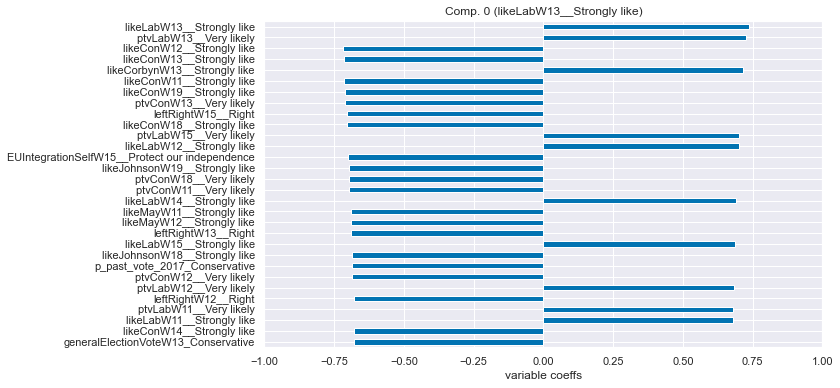

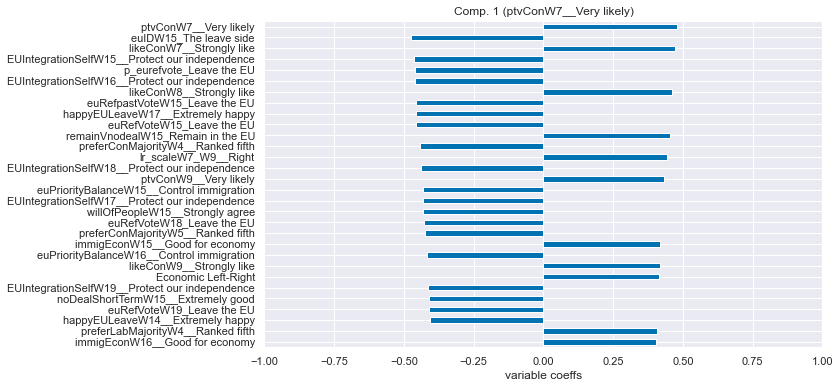

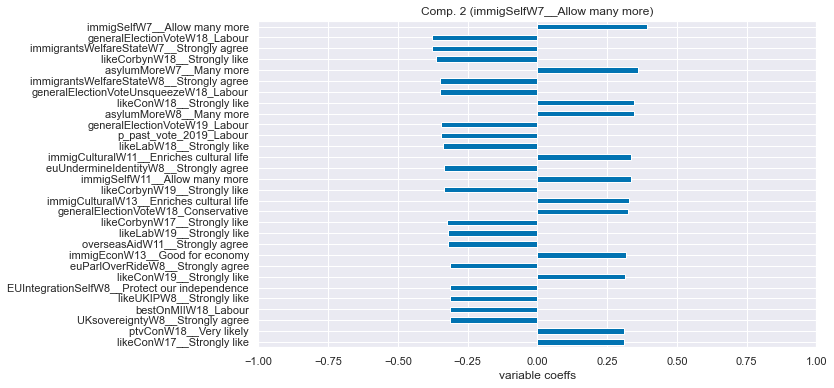

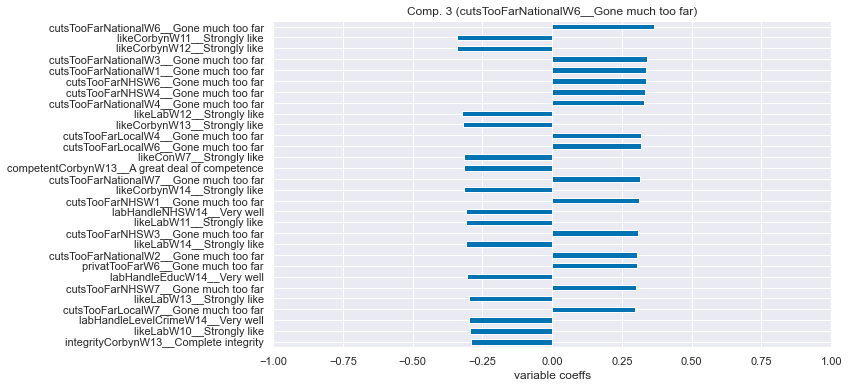

In [55]:
%%time



# value_vars = [x for x in manifesto_project.columns if re.match("per(\d+|uncod)|rile|planeco|markeco|welfare|intpeace",x)]
# value_vars = search(BES_reduced_with_na,"taxSpend|tax(Low|Middle|High)Income|bes(1|2|3|4)(a|b)W2|socialCare|howToReduceDeficit|deficitReduce|spend(Health|Pensions|Unemp)").index
# rile, planeco, markeco, welfare, intpeace
# notnulls = BES_reduced_with_na[value_vars].notnull().any(axis=1)

# df["peruncod"]
# percentage uncoded
# MCP_vals.columns = [variable_labels.loc[x]+"("+x.replace("per","")+")" for x in MCP_vals.columns]
# MCP_vals.columns
MCP_vals = MCP_vals[kBestCols].drop_duplicates()


decomp_index = MCP_vals.index
decomp_columns = MCP_vals.columns
clean_feature_set_std = StandardScaler().fit_transform(MCP_vals.values )
decomp_std = pd.DataFrame(   clean_feature_set_std,
                             columns = MCP_vals.columns,
                             index   = MCP_vals.index      )



# 5 mins
## RUN (some variant of) PCA (potentially v slow!)
n_components = decomp_std.shape[1]
n_components = 4
# (svd_solver='full', n_components='mle',whiten=True)
# decomp = PCA(n_components = n_components,svd_solver='full')
# decomp = FastICA(algorithm='deflation', fun='exp', fun_args=None, max_iter=1000,
#     n_components=None, random_state=None, tol=0.07, w_init=None, whiten=False) # 2h 1min 4s "fast"
# decomp = SparsePCA(n_components=n_components, alpha=2,max_iter=1000,n_jobs=4,tol=1e-10, verbose=True) # 5min
#
# alpha=2 -> 1hr

decomp = FactorAnalysis(svd_method = 'lapack',n_components = n_components) ## ~10s ,n_components=30 -> 1.5 hrs
decomp_method = str(decomp).split("(")[0] 
# ,n_components=30

X_r = decomp.fit_transform(decomp_std)

BES_decomp = pd.DataFrame(   X_r,
                             columns = range(0,n_components),
                             index   = decomp_index)


import pickle
# treatdir = BES_data_folder+Treatment
# subdir = BES_data_folder+Treatment+decomp_method
load_suff = "FactorAnalysis"
save = True # False => Load

if save & ( 'decomp' in globals() ): # SAVE    ##( 'decomp' not in globals() )
    decomp_method = str(decomp).split("(")[0] 
    subdir = output_subfolder + decomp_method
    fname = subdir+ os.sep + decomp_method
    # create dir, save decomp object, BES_decomp, BES_std    
    if not os.path.exists(subdir): os.makedirs(subdir)
    with open(fname+".pkl", "wb") as f: pickle.dump( decomp, f )
    BES_decomp.to_hdf(fname+".hdf"        , decomp_method)
    decomp_std.to_hdf(   fname+"_std"+".hdf" , decomp_method)
    
else: # LOAD decomp results (default is SAVE)
    decomp_method = load_suff
    subdir = output_subfolder + os.sep + decomp_method    
    fname = subdir + os.sep + decomp_method
    if not os.path.exists(subdir): raise Exception(subdir + ' does not exist!')
    # load decomp object, BES_decomp, BES_std, n_components
    with open(fname+".pkl", "rb") as f: decomp = pickle.load(f) 
    BES_decomp = pd.read_hdf(fname+".hdf")
    decomp_std    = pd.read_hdf(fname+"_std"+".hdf")
    n_components = decomp.components_.shape[0] 
    
    
(BES_decomp, comp_labels, comp_dict) = display_components(n_components, decomp,
                                                          decomp_columns, BES_decomp, manifest=None, 
                                                          save_folder = subdir,  
                                                          show_first_x_comps= 4, show_histogram = False)    

In [ ]:
#### Clustering

Module created for script run in IPython
n_digits: 10, 	 n_samples 1797, 	 n_features 64
__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	0.59s	69510	0.610	0.657	0.633	0.481	0.629	0.129
random   	0.46s	69907	0.633	0.674	0.653	0.518	0.649	0.131
PCA-based	0.06s	70768	0.668	0.695	0.681	0.558	0.678	0.142
__________________________________________________________________________________


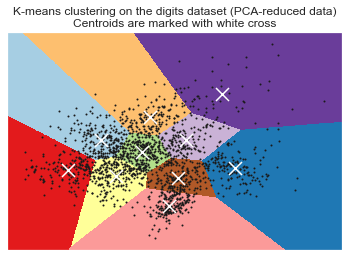

In [4]:
print(__doc__)

from time import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

np.random.seed(42)

X_digits, y_digits = load_digits(return_X_y=True)
data = scale(X_digits)

n_samples, n_features = data.shape
n_digits = len(np.unique(y_digits))
labels = y_digits

sample_size = 300

print("n_digits: %d, \t n_samples %d, \t n_features %d"
      % (n_digits, n_samples, n_features))


print(82 * '_')
print('init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')


def bench_k_means(estimator, name, data):
    t0 = time()
    estimator.fit(data)
    print('%-9s\t%.2fs\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
          % (name, (time() - t0), estimator.inertia_,
             metrics.homogeneity_score(labels, estimator.labels_),
             metrics.completeness_score(labels, estimator.labels_),
             metrics.v_measure_score(labels, estimator.labels_),
             metrics.adjusted_rand_score(labels, estimator.labels_),
             metrics.adjusted_mutual_info_score(labels,  estimator.labels_),
             metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean',
                                      sample_size=sample_size)))

bench_k_means(KMeans(init='k-means++', n_clusters=n_digits, n_init=10),
              name="k-means++", data=data)

bench_k_means(KMeans(init='random', n_clusters=n_digits, n_init=10),
              name="random", data=data)

# in this case the seeding of the centers is deterministic, hence we run the
# kmeans algorithm only once with n_init=1
pca = PCA(n_components=n_digits).fit(data)
bench_k_means(KMeans(init=pca.components_, n_clusters=n_digits, n_init=1),
              name="PCA-based",
              data=data)
print(82 * '_')

# #############################################################################
# Visualize the results on PCA-reduced data

reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init='k-means++', n_clusters=n_digits, n_init=10)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [5]:
BES_decomp

0         1         2         3         4
id                                                     
24    -5.679639  1.335979 -0.925817  1.153021 -0.977863
29     0.293828 -2.964329 -0.742896  0.289664 -1.149956
62     2.089608  0.096483  0.527809 -2.433402  2.738311
126    1.307585 -0.547334  0.636491  0.357095  2.700134
130    0.220777 -2.050434 -1.754994  0.079892 -1.428194
...         ...       ...       ...       ...       ...
81092 -1.213065  0.130662  0.047056 -0.497894  0.672775
81093  0.158600 -0.180884  0.206809  0.212087  0.190869
81094  1.939137  0.096213 -1.317040  2.296731  0.757762
81095 -0.325703 -0.183477  0.295230  0.185838  0.607225
81097  0.640549 -0.343824  0.245541  0.609070  0.528121

[6185 rows x 5 columns]

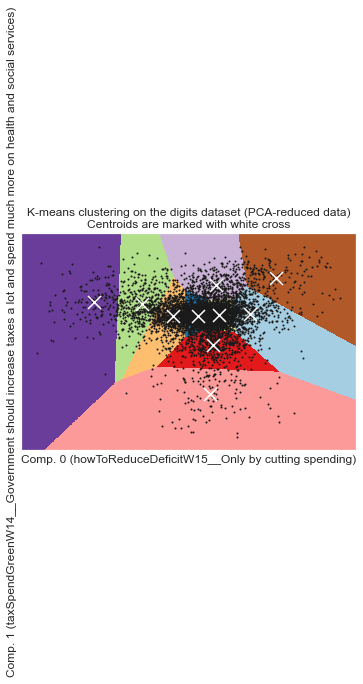

In [14]:
reduced_data = BES_decomp.values
x_axis = 0
y_axis = 1

kmeans = KMeans(init='k-means++', n_clusters=n_digits, n_init=10)
kmeans.fit(reduced_data[:,[x_axis,y_axis]])

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, x_axis].min() - 1, reduced_data[:, x_axis].max() + 1
y_min, y_max = reduced_data[:, y_axis].min() - 1, reduced_data[:, y_axis].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, x_axis], reduced_data[:, y_axis], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

plt.xlabel(comp_labels[x_axis])
plt.ylabel(comp_labels[y_axis])

plt.show()

In [10]:
reduced_data[:,0:2]

array([[-5.679639  ,  1.3359787 ],
       [ 0.29382837, -2.9643285 ],
       [ 2.0896084 ,  0.096483  ],
       ...,
       [ 1.9391373 ,  0.09621324],
       [-0.32570282, -0.18347701],
       [ 0.6405492 , -0.34382442]], dtype=float32)

{0: 'Comp. 0 (howToReduceDeficitW15__Only by cutting spending)',
 1: 'Comp. 1 (taxSpendGreenW14__Government should increase taxes a lot and spend much more on health and social services)',
 2: 'Comp. 2 (taxSpendUKIPW14__Government should increase taxes a lot and spend much more on health and social services)',
 3: 'Comp. 3 (taxMiddleIncomeW15__Much too high)',
 4: 'Comp. 4 (taxLowIncomeW15__Much too high)'}

Estimated number of clusters: 3
Homogeneity: 0.872
Completeness: 0.872
V-measure: 0.872
Adjusted Rand Index: 0.912
Adjusted Mutual Information: 0.871
Silhouette Coefficient: 0.753


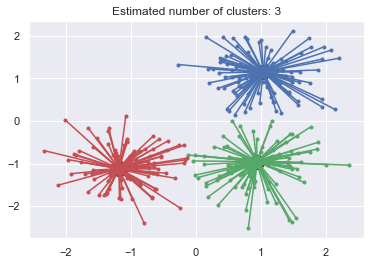

In [15]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from sklearn.datasets import make_blobs

# #############################################################################
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=300, centers=centers, cluster_std=0.5,
                            random_state=0)

# #############################################################################
# Compute Affinity Propagation
af = AffinityPropagation(preference=-50).fit(X)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)

print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels, metric='sqeuclidean'))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt
from itertools import cycle

plt.close('all')
plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X[cluster_centers_indices[k]]
    plt.plot(X[class_members, 0], X[class_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
    for x in X[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

Estimated number of clusters: 25
Homogeneity: 0.150
Completeness: 0.078
V-measure: 0.103
Adjusted Rand Index: 0.018
Adjusted Mutual Information: 0.064


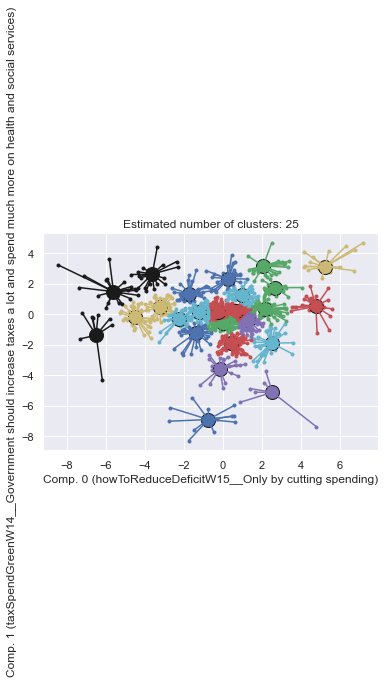

Wall time: 20.9 s


In [57]:
%%time
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from sklearn.datasets import make_blobs

# #############################################################################
# Generate sample data
# centers = [[1, 1], [-1, -1], [1, -1]]
# X, labels_true = make_blobs(n_samples=300, centers=centers, cluster_std=0.5,
#                             random_state=0)

X = BES_decomp.values[::5,0:2]
# just to put *something* in there
labels_true = pan_dataset_votes.loc[BES_decomp.index[::5],"2017GEVote_complete"].cat.remove_unused_categories().cat.codes.values

# #############################################################################
# Compute Affinity Propagation
af = AffinityPropagation(preference=-20,damping=.97).fit(X)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)

print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
# print("Silhouette Coefficient: %0.3f"
#       % metrics.silhouette_score(X, labels, metric='sqeuclidean'))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt
from itertools import cycle

plt.close('all')
plt.figure(1,figsize=(12,8))
plt.clf()

# bgrcmykbgrcmykbgrcmyk
colors = cycle('bgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X[cluster_centers_indices[k]]
    plt.plot(X[class_members, 0], X[class_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
    for x in X[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: %d' % n_clusters_)

plt.xlabel(comp_labels[x_axis])
plt.ylabel(comp_labels[y_axis])

plt.show()

In [34]:
af

AffinityPropagation(affinity='euclidean', convergence_iter=15, copy=True,
                    damping=0.5, max_iter=200, preference=-50, verbose=False)

number of estimated clusters : 12


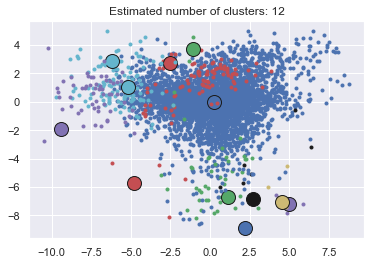

In [55]:
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs

# #############################################################################
# Generate sample data
# centers = [[1, 1], [-1, -1], [1, -1]]
# X, _ = make_blobs(n_samples=10000, centers=centers, cluster_std=0.6)

X = BES_decomp.values#[:,0:2]

# #############################################################################
# Compute clustering with MeanShift

# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

# #############################################################################
# Plot result
import matplotlib.pyplot as plt
from itertools import cycle

plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

Computing embedding
Done.
ward :	0.86s
average :	0.67s
complete :	0.65s
single :	0.36s


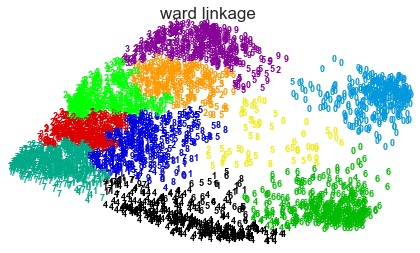

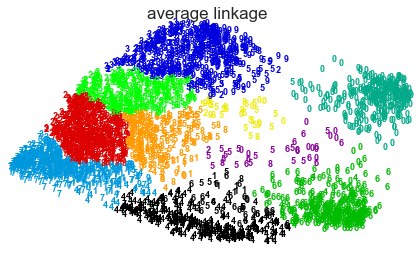

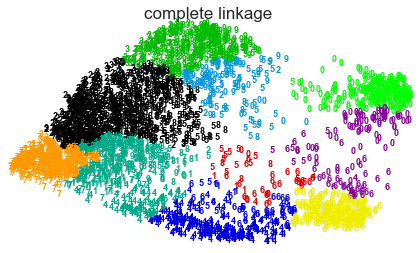

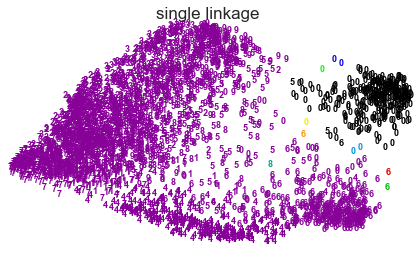

In [58]:
from time import time

import numpy as np
from scipy import ndimage
from matplotlib import pyplot as plt

from sklearn import manifold, datasets

X, y = datasets.load_digits(return_X_y=True)
n_samples, n_features = X.shape

np.random.seed(0)

def nudge_images(X, y):
    # Having a larger dataset shows more clearly the behavior of the
    # methods, but we multiply the size of the dataset only by 2, as the
    # cost of the hierarchical clustering methods are strongly
    # super-linear in n_samples
    shift = lambda x: ndimage.shift(x.reshape((8, 8)),
                                  .3 * np.random.normal(size=2),
                                  mode='constant',
                                  ).ravel()
    X = np.concatenate([X, np.apply_along_axis(shift, 1, X)])
    Y = np.concatenate([y, y], axis=0)
    return X, Y


X, y = nudge_images(X, y)


#----------------------------------------------------------------------
# Visualize the clustering
def plot_clustering(X_red, labels, title=None):
    x_min, x_max = np.min(X_red, axis=0), np.max(X_red, axis=0)
    X_red = (X_red - x_min) / (x_max - x_min)

    plt.figure(figsize=(6, 4))
    for i in range(X_red.shape[0]):
        plt.text(X_red[i, 0], X_red[i, 1], str(y[i]),
                 color=plt.cm.nipy_spectral(labels[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    plt.xticks([])
    plt.yticks([])
    if title is not None:
        plt.title(title, size=17)
    plt.axis('off')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

#----------------------------------------------------------------------
# 2D embedding of the digits dataset
print("Computing embedding")
X_red = manifold.SpectralEmbedding(n_components=2).fit_transform(X)
print("Done.")

from sklearn.cluster import AgglomerativeClustering

for linkage in ('ward', 'average', 'complete', 'single'):
    clustering = AgglomerativeClustering(linkage=linkage, n_clusters=10)
    t0 = time()
    clustering.fit(X_red)
    print("%s :\t%.2fs" % (linkage, time() - t0))

    plot_clustering(X_red, clustering.labels_, "%s linkage" % linkage)


plt.show()

Computing embedding
Done.
ward :	2.33s
average :	2.10s
complete :	2.08s
single :	1.07s


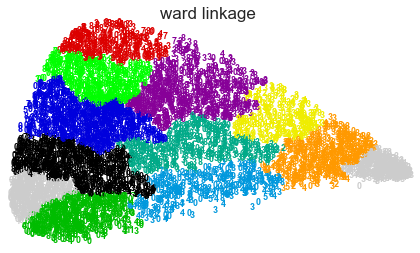

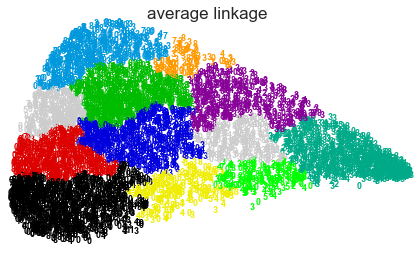

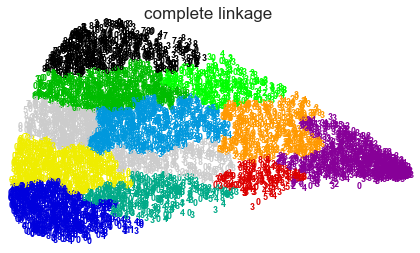

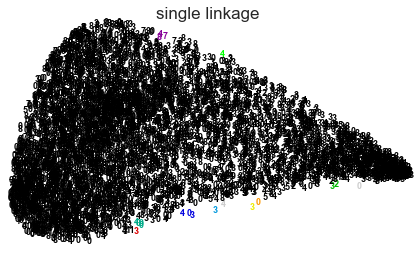

In [73]:
from time import time

import numpy as np
from scipy import ndimage
from matplotlib import pyplot as plt

from sklearn import manifold, datasets

X = BES_decomp.values
# just to put *something* in there
y = pan_dataset_votes.loc[BES_decomp.index,"2017GEVote_complete"].cat.remove_unused_categories().cat.codes.values


# X, y = datasets.load_digits(return_X_y=True)
n_samples, n_features = X.shape

np.random.seed(0)

# def nudge_images(X, y):
#     # Having a larger dataset shows more clearly the behavior of the
#     # methods, but we multiply the size of the dataset only by 2, as the
#     # cost of the hierarchical clustering methods are strongly
#     # super-linear in n_samples
#     shift = lambda x: ndimage.shift(x.reshape((8, 8)),
#                                   .3 * np.random.normal(size=2),
#                                   mode='constant',
#                                   ).ravel()
#     X = np.concatenate([X, np.apply_along_axis(shift, 1, X)])
#     Y = np.concatenate([y, y], axis=0)
#     return X, Y


# X, y = nudge_images(X, y)


#----------------------------------------------------------------------
# Visualize the clustering
def plot_clustering(X_red, labels, title=None):
    x_min, x_max = np.min(X_red, axis=0), np.max(X_red, axis=0)
    X_red = (X_red - x_min) / (x_max - x_min)

    plt.figure(figsize=(6, 4))
    for i in range(X_red.shape[0]):
        plt.text(X_red[i, 0], X_red[i, 1], str(y[i]),
                 color=plt.cm.nipy_spectral(labels[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    plt.xticks([])
    plt.yticks([])
    if title is not None:
        plt.title(title, size=17)
    plt.axis('off')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

#----------------------------------------------------------------------
# 2D embedding of the digits dataset
print("Computing embedding")
X_red = manifold.SpectralEmbedding(n_components=2).fit_transform(X)
print("Done.")

from sklearn.cluster import AgglomerativeClustering

for linkage in ('ward', 'average', 'complete', 'single'):
    clustering = AgglomerativeClustering(linkage=linkage, n_clusters=y.max()+1)
    t0 = time()
    clustering.fit(X_red)
    print("%s :\t%.2fs" % (linkage, time() - t0))

    plot_clustering(X_red, clustering.labels_, "%s linkage" % linkage)


plt.show()

In [72]:
%debug

> <ipython-input-71-7411e748469a>(44)plot_clustering()
     42     plt.figure(figsize=(6, 4))
     43     for i in range(X_red.shape[0]):
---> 44         plt.text(X_red[i, 0], X_red[i, 1], str(y[i]),
     45                  color=plt.cm.nipy_spectral(labels[i] / 10.),
     46                  fontdict={'weight': 'bold', 'size': 9})

ipdb> i
3594
ipdb> X_red.shape
(6185, 2)
ipdb> y.shape
(3594,)
ipdb> labels.shape
(6185,)
ipdb> y[i]
*** IndexError: index 3594 is out of bounds for axis 0 with size 3594
ipdb> quit


Estimated number of clusters: 3
Estimated number of noise points: 18
Homogeneity: 0.953
Completeness: 0.883
V-measure: 0.917
Adjusted Rand Index: 0.952
Adjusted Mutual Information: 0.916
Silhouette Coefficient: 0.626


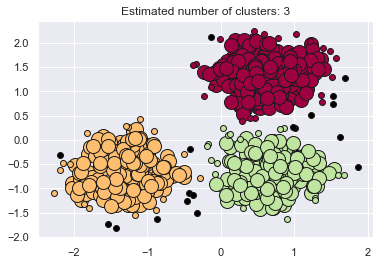

In [74]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler


# #############################################################################
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)

X = StandardScaler().fit_transform(X)

# #############################################################################
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

Estimated number of clusters: 3
Estimated number of noise points: 1985
Homogeneity: 0.007
Completeness: 0.016
V-measure: 0.010
Adjusted Rand Index: -0.008
Adjusted Mutual Information: 0.008
Silhouette Coefficient: 0.108


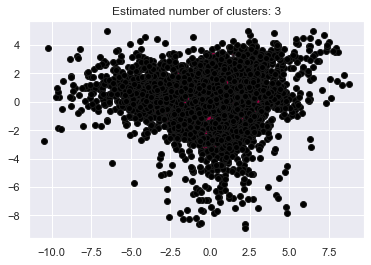

In [91]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler


# #############################################################################
# Generate sample data
# centers = [[1, 1], [-1, -1], [1, -1]]
# X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
#                             random_state=0)

# X = StandardScaler().fit_transform(X)
X = BES_decomp.values
# just to put *something* in there
labels_true = pan_dataset_votes.loc[BES_decomp.index,"2017GEVote_complete"].cat.remove_unused_categories().cat.codes.values


# #############################################################################
# Compute DBSCAN
db = DBSCAN(eps=1, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [92]:
pd.Series(labels).value_counts()

 0    4175
-1    1985
 2      16
 1       9
dtype: int64

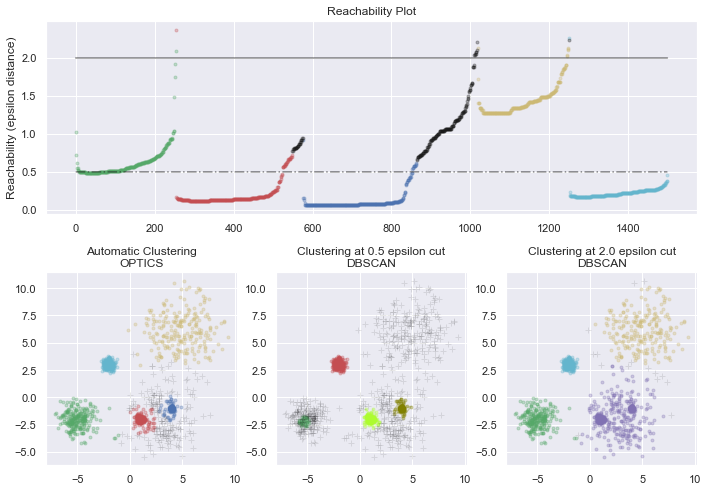

In [93]:


from sklearn.cluster import OPTICS, cluster_optics_dbscan
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np

# Generate sample data

np.random.seed(0)
n_points_per_cluster = 250

C1 = [-5, -2] + .8 * np.random.randn(n_points_per_cluster, 2)
C2 = [4, -1] + .1 * np.random.randn(n_points_per_cluster, 2)
C3 = [1, -2] + .2 * np.random.randn(n_points_per_cluster, 2)
C4 = [-2, 3] + .3 * np.random.randn(n_points_per_cluster, 2)
C5 = [3, -2] + 1.6 * np.random.randn(n_points_per_cluster, 2)
C6 = [5, 6] + 2 * np.random.randn(n_points_per_cluster, 2)
X = np.vstack((C1, C2, C3, C4, C5, C6))

clust = OPTICS(min_samples=50, xi=.05, min_cluster_size=.05)

# Run the fit
clust.fit(X)

labels_050 = cluster_optics_dbscan(reachability=clust.reachability_,
                                   core_distances=clust.core_distances_,
                                   ordering=clust.ordering_, eps=0.5)
labels_200 = cluster_optics_dbscan(reachability=clust.reachability_,
                                   core_distances=clust.core_distances_,
                                   ordering=clust.ordering_, eps=2)

space = np.arange(len(X))
reachability = clust.reachability_[clust.ordering_]
labels = clust.labels_[clust.ordering_]

plt.figure(figsize=(10, 7))
G = gridspec.GridSpec(2, 3)
ax1 = plt.subplot(G[0, :])
ax2 = plt.subplot(G[1, 0])
ax3 = plt.subplot(G[1, 1])
ax4 = plt.subplot(G[1, 2])

# Reachability plot
colors = ['g.', 'r.', 'b.', 'y.', 'c.']
for klass, color in zip(range(0, 5), colors):
    Xk = space[labels == klass]
    Rk = reachability[labels == klass]
    ax1.plot(Xk, Rk, color, alpha=0.3)
ax1.plot(space[labels == -1], reachability[labels == -1], 'k.', alpha=0.3)
ax1.plot(space, np.full_like(space, 2., dtype=float), 'k-', alpha=0.5)
ax1.plot(space, np.full_like(space, 0.5, dtype=float), 'k-.', alpha=0.5)
ax1.set_ylabel('Reachability (epsilon distance)')
ax1.set_title('Reachability Plot')

# OPTICS
colors = ['g.', 'r.', 'b.', 'y.', 'c.']
for klass, color in zip(range(0, 5), colors):
    Xk = X[clust.labels_ == klass]
    ax2.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3)
ax2.plot(X[clust.labels_ == -1, 0], X[clust.labels_ == -1, 1], 'k+', alpha=0.1)
ax2.set_title('Automatic Clustering\nOPTICS')

# DBSCAN at 0.5
colors = ['g', 'greenyellow', 'olive', 'r', 'b', 'c']
for klass, color in zip(range(0, 6), colors):
    Xk = X[labels_050 == klass]
    ax3.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3, marker='.')
ax3.plot(X[labels_050 == -1, 0], X[labels_050 == -1, 1], 'k+', alpha=0.1)
ax3.set_title('Clustering at 0.5 epsilon cut\nDBSCAN')

# DBSCAN at 2.
colors = ['g.', 'm.', 'y.', 'c.']
for klass, color in zip(range(0, 4), colors):
    Xk = X[labels_200 == klass]
    ax4.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3)
ax4.plot(X[labels_200 == -1, 0], X[labels_200 == -1, 1], 'k+', alpha=0.1)
ax4.set_title('Clustering at 2.0 epsilon cut\nDBSCAN')

plt.tight_layout()
plt.show()

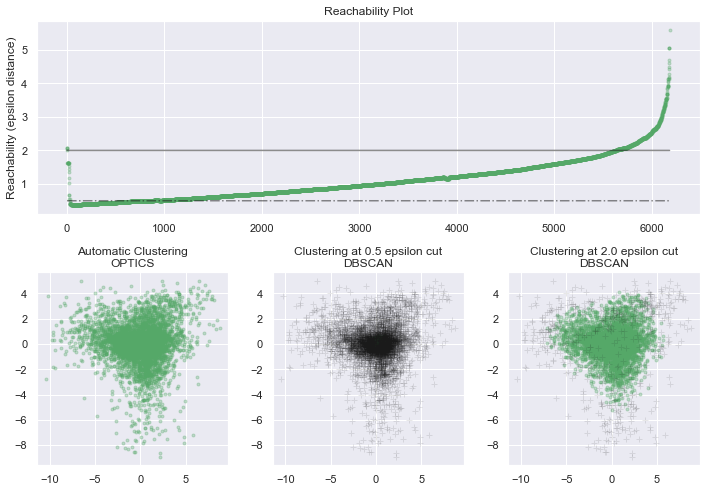

In [95]:


from sklearn.cluster import OPTICS, cluster_optics_dbscan
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np

# Generate sample data

# np.random.seed(0)
# n_points_per_cluster = 250

# C1 = [-5, -2] + .8 * np.random.randn(n_points_per_cluster, 2)
# C2 = [4, -1] + .1 * np.random.randn(n_points_per_cluster, 2)
# C3 = [1, -2] + .2 * np.random.randn(n_points_per_cluster, 2)
# C4 = [-2, 3] + .3 * np.random.randn(n_points_per_cluster, 2)
# C5 = [3, -2] + 1.6 * np.random.randn(n_points_per_cluster, 2)
# C6 = [5, 6] + 2 * np.random.randn(n_points_per_cluster, 2)
# X = np.vstack((C1, C2, C3, C4, C5, C6))

X = BES_decomp.values
# just to put *something* in there
labels_true = pan_dataset_votes.loc[BES_decomp.index,"2017GEVote_complete"].cat.remove_unused_categories().cat.codes.values




clust = OPTICS(min_samples=50, xi=.05, min_cluster_size=.05)

# Run the fit
clust.fit(X)

labels_050 = cluster_optics_dbscan(reachability=clust.reachability_,
                                   core_distances=clust.core_distances_,
                                   ordering=clust.ordering_, eps=0.5)
labels_200 = cluster_optics_dbscan(reachability=clust.reachability_,
                                   core_distances=clust.core_distances_,
                                   ordering=clust.ordering_, eps=2)

space = np.arange(len(X))
reachability = clust.reachability_[clust.ordering_]
labels = clust.labels_[clust.ordering_]

plt.figure(figsize=(10, 7))
G = gridspec.GridSpec(2, 3)
ax1 = plt.subplot(G[0, :])
ax2 = plt.subplot(G[1, 0])
ax3 = plt.subplot(G[1, 1])
ax4 = plt.subplot(G[1, 2])

# Reachability plot
colors = ['g.', 'r.', 'b.', 'y.', 'c.']
for klass, color in zip(range(0, 5), colors):
    Xk = space[labels == klass]
    Rk = reachability[labels == klass]
    ax1.plot(Xk, Rk, color, alpha=0.3)
ax1.plot(space[labels == -1], reachability[labels == -1], 'k.', alpha=0.3)
ax1.plot(space, np.full_like(space, 2., dtype=float), 'k-', alpha=0.5)
ax1.plot(space, np.full_like(space, 0.5, dtype=float), 'k-.', alpha=0.5)
ax1.set_ylabel('Reachability (epsilon distance)')
ax1.set_title('Reachability Plot')

# OPTICS
colors = ['g.', 'r.', 'b.', 'y.', 'c.']
for klass, color in zip(range(0, 5), colors):
    Xk = X[clust.labels_ == klass]
    ax2.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3)
ax2.plot(X[clust.labels_ == -1, 0], X[clust.labels_ == -1, 1], 'k+', alpha=0.1)
ax2.set_title('Automatic Clustering\nOPTICS')

# DBSCAN at 0.5
colors = ['g', 'greenyellow', 'olive', 'r', 'b', 'c']
for klass, color in zip(range(0, 6), colors):
    Xk = X[labels_050 == klass]
    ax3.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3, marker='.')
ax3.plot(X[labels_050 == -1, 0], X[labels_050 == -1, 1], 'k+', alpha=0.1)
ax3.set_title('Clustering at 0.5 epsilon cut\nDBSCAN')

# DBSCAN at 2.
colors = ['g.', 'm.', 'y.', 'c.']
for klass, color in zip(range(0, 4), colors):
    Xk = X[labels_200 == klass]
    ax4.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3)
ax4.plot(X[labels_200 == -1, 0], X[labels_200 == -1, 1], 'k+', alpha=0.1)
ax4.set_title('Clustering at 2.0 epsilon cut\nDBSCAN')

plt.tight_layout()
plt.show()

Birch without global clustering as the final step took 6.16 seconds
n_clusters : 158
Birch with global clustering as the final step took 6.01 seconds
n_clusters : 100
Time taken to run MiniBatchKMeans 7.44 seconds


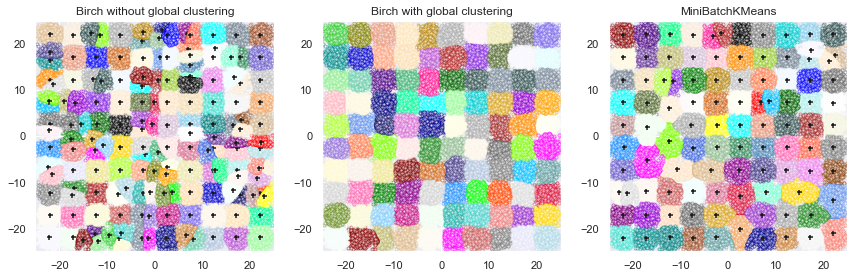

In [96]:

from itertools import cycle
from time import time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

from sklearn.cluster import Birch, MiniBatchKMeans
from sklearn.datasets import make_blobs


# Generate centers for the blobs so that it forms a 10 X 10 grid.
xx = np.linspace(-22, 22, 10)
yy = np.linspace(-22, 22, 10)
xx, yy = np.meshgrid(xx, yy)
n_centres = np.hstack((np.ravel(xx)[:, np.newaxis],
                       np.ravel(yy)[:, np.newaxis]))

# Generate blobs to do a comparison between MiniBatchKMeans and Birch.
X, y = make_blobs(n_samples=100000, centers=n_centres, random_state=0)

# Use all colors that matplotlib provides by default.
colors_ = cycle(colors.cnames.keys())

fig = plt.figure(figsize=(12, 4))
fig.subplots_adjust(left=0.04, right=0.98, bottom=0.1, top=0.9)

# Compute clustering with Birch with and without the final clustering step
# and plot.
birch_models = [Birch(threshold=1.7, n_clusters=None),
                Birch(threshold=1.7, n_clusters=100)]
final_step = ['without global clustering', 'with global clustering']

for ind, (birch_model, info) in enumerate(zip(birch_models, final_step)):
    t = time()
    birch_model.fit(X)
    time_ = time() - t
    print("Birch %s as the final step took %0.2f seconds" % (
          info, (time() - t)))

    # Plot result
    labels = birch_model.labels_
    centroids = birch_model.subcluster_centers_
    n_clusters = np.unique(labels).size
    print("n_clusters : %d" % n_clusters)

    ax = fig.add_subplot(1, 3, ind + 1)
    for this_centroid, k, col in zip(centroids, range(n_clusters), colors_):
        mask = labels == k
        ax.scatter(X[mask, 0], X[mask, 1],
                   c='w', edgecolor=col, marker='.', alpha=0.5)
        if birch_model.n_clusters is None:
            ax.scatter(this_centroid[0], this_centroid[1], marker='+',
                       c='k', s=25)
    ax.set_ylim([-25, 25])
    ax.set_xlim([-25, 25])
    ax.set_autoscaley_on(False)
    ax.set_title('Birch %s' % info)

# Compute clustering with MiniBatchKMeans.
mbk = MiniBatchKMeans(init='k-means++', n_clusters=100, batch_size=100,
                      n_init=10, max_no_improvement=10, verbose=0,
                      random_state=0)
t0 = time()
mbk.fit(X)
t_mini_batch = time() - t0
print("Time taken to run MiniBatchKMeans %0.2f seconds" % t_mini_batch)
mbk_means_labels_unique = np.unique(mbk.labels_)

ax = fig.add_subplot(1, 3, 3)
for this_centroid, k, col in zip(mbk.cluster_centers_,
                                 range(n_clusters), colors_):
    mask = mbk.labels_ == k
    ax.scatter(X[mask, 0], X[mask, 1], marker='.',
               c='w', edgecolor=col, alpha=0.5)
    ax.scatter(this_centroid[0], this_centroid[1], marker='+',
               c='k', s=25)
ax.set_xlim([-25, 25])
ax.set_ylim([-25, 25])
ax.set_title("MiniBatchKMeans")
ax.set_autoscaley_on(False)
plt.show()

Birch without global clustering as the final step took 0.30 seconds
n_clusters : 16
Birch with global clustering as the final step took 0.33 seconds
n_clusters : 16
Time taken to run MiniBatchKMeans 0.32 seconds


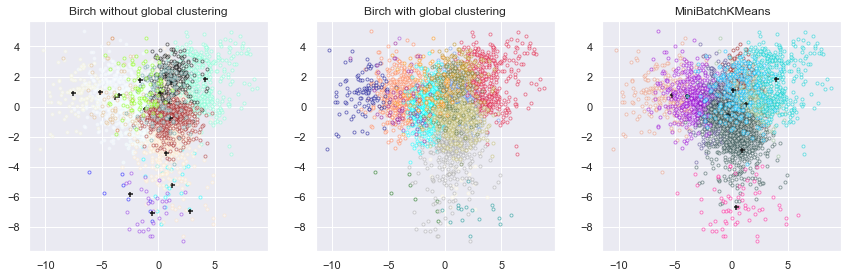

In [104]:

from itertools import cycle
from time import time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

from sklearn.cluster import Birch, MiniBatchKMeans
from sklearn.datasets import make_blobs


# # Generate centers for the blobs so that it forms a 10 X 10 grid.
# xx = np.linspace(-22, 22, 10)
# yy = np.linspace(-22, 22, 10)
# xx, yy = np.meshgrid(xx, yy)
# n_centres = np.hstack((np.ravel(xx)[:, np.newaxis],
#                        np.ravel(yy)[:, np.newaxis]))

# # Generate blobs to do a comparison between MiniBatchKMeans and Birch.
# X, y = make_blobs(n_samples=100000, centers=n_centres, random_state=0)

X = BES_decomp.values

# Use all colors that matplotlib provides by default.
colors_ = cycle(colors.cnames.keys())

fig = plt.figure(figsize=(12, 4))
fig.subplots_adjust(left=0.04, right=0.98, bottom=0.1, top=0.9)

# Compute clustering with Birch with and without the final clustering step
# and plot.
birch_models = [Birch(threshold=3.5, n_clusters=None),
                Birch(threshold=3.5, n_clusters=100)]
final_step = ['without global clustering', 'with global clustering']

for ind, (birch_model, info) in enumerate(zip(birch_models, final_step)):
    t = time()
    birch_model.fit(X)
    time_ = time() - t
    print("Birch %s as the final step took %0.2f seconds" % (
          info, (time() - t)))

    # Plot result
    labels = birch_model.labels_
    centroids = birch_model.subcluster_centers_
    n_clusters = np.unique(labels).size
    print("n_clusters : %d" % n_clusters)

    ax = fig.add_subplot(1, 3, ind + 1)
    for this_centroid, k, col in zip(centroids, range(n_clusters), colors_):
        mask = labels == k
        ax.scatter(X[mask, 0], X[mask, 1],
                   c='w', edgecolor=col, marker='.', alpha=0.5)
        if birch_model.n_clusters is None:
            ax.scatter(this_centroid[0], this_centroid[1], marker='+',
                       c='k', s=25)
#     ax.set_ylim([-25, 25])
#     ax.set_xlim([-25, 25])
    ax.set_autoscaley_on(False)
    ax.set_title('Birch %s' % info)

# Compute clustering with MiniBatchKMeans.
mbk = MiniBatchKMeans(init='k-means++', n_clusters=10, batch_size=100,
                      n_init=10, max_no_improvement=10, verbose=0,
                      random_state=0)
t0 = time()
mbk.fit(X)
t_mini_batch = time() - t0
print("Time taken to run MiniBatchKMeans %0.2f seconds" % t_mini_batch)
mbk_means_labels_unique = np.unique(mbk.labels_)

ax = fig.add_subplot(1, 3, 3)
for this_centroid, k, col in zip(mbk.cluster_centers_,
                                 range(n_clusters), colors_):
    mask = mbk.labels_ == k
    ax.scatter(X[mask, 0], X[mask, 1], marker='.',
               c='w', edgecolor=col, alpha=0.5)
    ax.scatter(this_centroid[0], this_centroid[1], marker='+',
               c='k', s=25)
# ax.set_xlim([-25, 25])
# ax.set_ylim([-25, 25])
ax.set_title("MiniBatchKMeans")
ax.set_autoscaley_on(False)
plt.show()

In [ ]:
# https://hdbscan.readthedocs.io/en/latest/soft_clustering.html
# hdbscan

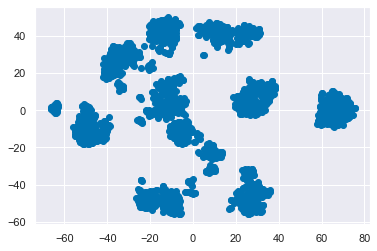

In [106]:
from sklearn import datasets
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

digits = datasets.load_digits()
data = digits.data
projection = TSNE().fit_transform(data)
plt.scatter(*projection.T)

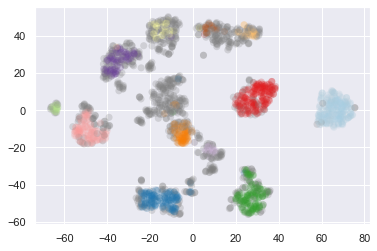

In [107]:
import hdbscan
clusterer = hdbscan.HDBSCAN(min_cluster_size=10, prediction_data=True).fit(data)
color_palette = sns.color_palette('Paired', 12)
cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in clusterer.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, clusterer.probabilities_)]
plt.scatter(*projection.T, s=50, linewidth=0, c=cluster_member_colors, alpha=0.25)

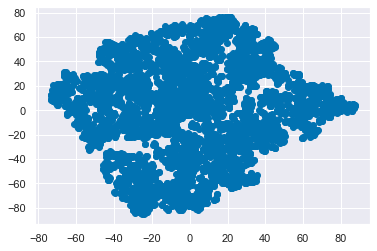

In [108]:
from sklearn import datasets
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# digits = datasets.load_digits()
# data = digits.data

data = BES_decomp.values
projection = TSNE().fit_transform(data)
plt.scatter(*projection.T)

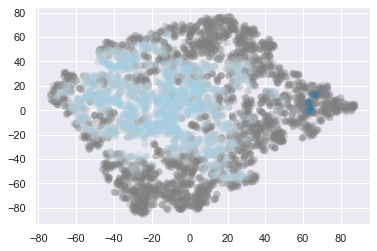

In [109]:
import hdbscan
clusterer = hdbscan.HDBSCAN(min_cluster_size=10, prediction_data=True).fit(data)
color_palette = sns.color_palette('Paired', 12)
cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in clusterer.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, clusterer.probabilities_)]
plt.scatter(*projection.T, s=50, linewidth=0, c=cluster_member_colors, alpha=0.25)